## Lib Imports and Environment Setup

In [1]:
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
import datetime

from unityagents import UnityEnvironment
from model import Actor, Critic
from ddpg_agent import Agent, OUNoise, ReplayBuffer

In [2]:
env = UnityEnvironment(file_name='C:/Users/adamb/OneDrive/Documents/Udacity Reinforcement Learning/4. Multi Agent Learning/Tennis_Windows_x86_64/Tennis')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
##Get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
##Reset the environment
env_info = env.reset(train_mode=True)[brain_name]

In [5]:
##Retrieve number of agents
num_agents = len(env_info.agents)

In [6]:
##Retrieve action size
action_size = brain.vector_action_space_size

In [7]:
##Retrieve state size
states = env_info.vector_observations
state_size = states.shape[1]

## Train Model

In [8]:
##Instanstiate Agent
agent = Agent(state_size=state_size, 
              action_size=action_size,
              random_seed=42,
              update_every=1)

In [9]:
##Define training loop
def ddpg(n_episodes=2000, max_t=1000, deque_len=100, print_every=100):
    
    scores_all = []
    scores_window = deque(maxlen=deque_len)
    scores_all_avg = []
    steps_taken = []
    max_score = -1000000
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        states = env_info.vector_observations
        agent.reset()
        scores = np.zeros(num_agents)
        
        for t in range(max_t):
            ##Determine next actions for both agents
            actions = agent.act(states)
            
            ##Execute Action
            env_info = env.step(actions)[brain_name]  
            
            ##Get Next State after Action
            next_states = env_info.vector_observations
            
            ##Get reward and done status from environment
            rewards = env_info.rewards
            #print(rewards)
            dones = env_info.local_done  
            
            ##Update Agent
            for a in range(num_agents):
                agent.step(states[a], actions[a], rewards[a], next_states[a], dones[a])
            
            ##Update Scores and state
            scores += rewards  
            states = next_states  
            
            ##End episode if done
            if any(dones):
                steps_taken.append(t)
                break
            
        print(datetime.datetime.now())
        print('Scores: ' + str(scores))
        
        scores_window.append(scores)
        scores_all.append(scores)
        
        scores_window_avg = np.mean(scores_window)
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, scores_window_avg, end=""))
        
        if scores_window_avg > max_score: 
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            
            max_score = scores_window_avg
            
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            
        scores_all_avg.append(scores_window_avg)
        print()
        
    return scores_all, scores_all_avg, steps_taken

In [10]:
##Execute Training
scores, scores_avg, steps_taken = ddpg(n_episodes = 10000, max_t = 2000, deque_len = 100, print_every=100)

C:\Users\adamb\Anaconda3\envs\testenv4\lib\site-packages\torch\nn\functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


2020-01-07 11:05:06.512532
Scores: [ 0.   -0.01]
Episode 1	Average Score: -0.00

2020-01-07 11:05:07.795175
Scores: [ 0.   -0.01]
Episode 2	Average Score: -0.00

2020-01-07 11:05:07.830168
Scores: [ 0.   -0.01]
Episode 3	Average Score: -0.00

2020-01-07 11:05:07.859167
Scores: [ 0.   -0.01]
Episode 4	Average Score: -0.00

2020-01-07 11:05:07.889167
Scores: [ 0.   -0.01]
Episode 5	Average Score: -0.00

2020-01-07 11:05:07.924168
Scores: [-0.01  0.  ]
Episode 6	Average Score: -0.00

2020-01-07 11:05:07.953166
Scores: [ 0.   -0.01]
Episode 7	Average Score: -0.00

2020-01-07 11:05:07.980168
Scores: [-0.01  0.  ]
Episode 8	Average Score: -0.00

2020-01-07 11:05:08.019168
Scores: [ 0.   -0.01]
Episode 9	Average Score: -0.00

2020-01-07 11:05:08.055168
Scores: [ 0.   -0.01]
Episode 10	Average Score: -0.00

2020-01-07 11:05:08.086169
Scores: [ 0.   -0.01]
Episode 11	Average Score: -0.00

2020-01-07 11:05:08.117167
Scores: [ 0.   -0.01]
Episode 12	Average Score: -0.00

2020-01-07 11:05:08.14816

2020-01-07 11:05:56.166724
Scores: [ 0.   -0.01]
Episode 101	Average Score: -0.00

2020-01-07 11:05:56.712150
Scores: [ 0.   -0.01]
Episode 102	Average Score: -0.00

2020-01-07 11:05:57.256145
Scores: [ 0.   -0.01]
Episode 103	Average Score: -0.00

2020-01-07 11:05:57.832250
Scores: [ 0.   -0.01]
Episode 104	Average Score: -0.00

2020-01-07 11:05:58.377248
Scores: [-0.01  0.  ]
Episode 105	Average Score: -0.00

2020-01-07 11:05:58.915248
Scores: [-0.01  0.  ]
Episode 106	Average Score: -0.00

2020-01-07 11:05:59.459247
Scores: [ 0.   -0.01]
Episode 107	Average Score: -0.00

2020-01-07 11:05:59.998249
Scores: [ 0.   -0.01]
Episode 108	Average Score: -0.00

2020-01-07 11:06:00.596256
Scores: [ 0.   -0.01]
Episode 109	Average Score: -0.00

2020-01-07 11:06:01.165247
Scores: [-0.01  0.  ]
Episode 110	Average Score: -0.00

2020-01-07 11:06:01.723092
Scores: [ 0.   -0.01]
Episode 111	Average Score: -0.00

2020-01-07 11:06:02.286092
Scores: [-0.01  0.  ]
Episode 112	Average Score: -0.00

2020

2020-01-07 11:06:53.133523
Scores: [-0.01  0.  ]
Episode 200	Average Score: -0.00
Episode 200	Average Score: -0.00

2020-01-07 11:06:53.801701
Scores: [-0.01  0.  ]
Episode 201	Average Score: -0.00

2020-01-07 11:06:54.398056
Scores: [ 0.   -0.01]
Episode 202	Average Score: -0.00

2020-01-07 11:06:55.011884
Scores: [ 0.   -0.01]
Episode 203	Average Score: -0.00

2020-01-07 11:06:55.703886
Scores: [-0.01  0.  ]
Episode 204	Average Score: -0.00

2020-01-07 11:06:57.329733
Scores: [0.   0.09]
Episode 205	Average Score: -0.00

2020-01-07 11:06:57.990733
Scores: [ 0.   -0.01]
Episode 206	Average Score: -0.00

2020-01-07 11:06:58.656734
Scores: [ 0.   -0.01]
Episode 207	Average Score: -0.00

2020-01-07 11:06:59.266733
Scores: [-0.01  0.  ]
Episode 208	Average Score: -0.00

2020-01-07 11:06:59.924762
Scores: [ 0.   -0.01]
Episode 209	Average Score: -0.00

2020-01-07 11:07:00.483751
Scores: [-0.01  0.  ]
Episode 210	Average Score: -0.00

2020-01-07 11:07:01.033097
Scores: [-0.01  0.  ]
Episode

2020-01-07 11:07:57.916586
Scores: [ 0.   -0.01]
Episode 299	Average Score: -0.00

2020-01-07 11:07:58.487586
Scores: [ 0.   -0.01]
Episode 300	Average Score: -0.00
Episode 300	Average Score: -0.00

2020-01-07 11:07:59.667977
Scores: [ 0.1  -0.01]
Episode 301	Average Score: 0.00

2020-01-07 11:08:00.236971
Scores: [-0.01  0.  ]
Episode 302	Average Score: 0.00

2020-01-07 11:08:00.784976
Scores: [ 0.   -0.01]
Episode 303	Average Score: 0.00

2020-01-07 11:08:01.332976
Scores: [-0.01  0.  ]
Episode 304	Average Score: 0.00

2020-01-07 11:08:01.923971
Scores: [-0.01  0.  ]
Episode 305	Average Score: -0.00

2020-01-07 11:08:02.487951
Scores: [ 0.   -0.01]
Episode 306	Average Score: -0.00

2020-01-07 11:08:03.055976
Scores: [ 0.   -0.01]
Episode 307	Average Score: -0.00

2020-01-07 11:08:03.615971
Scores: [-0.01  0.  ]
Episode 308	Average Score: -0.00

2020-01-07 11:08:04.162947
Scores: [-0.01  0.  ]
Episode 309	Average Score: -0.00

2020-01-07 11:08:04.777946
Scores: [ 0.   -0.01]
Episode 3

2020-01-07 11:08:59.464246
Scores: [-0.01  0.  ]
Episode 398	Average Score: -0.00

2020-01-07 11:09:00.026464
Scores: [ 0.   -0.01]
Episode 399	Average Score: -0.00

2020-01-07 11:09:00.606012
Scores: [-0.01  0.  ]
Episode 400	Average Score: -0.00
Episode 400	Average Score: -0.00

2020-01-07 11:09:01.177007
Scores: [-0.01  0.  ]
Episode 401	Average Score: -0.00

2020-01-07 11:09:01.741665
Scores: [-0.01  0.  ]
Episode 402	Average Score: -0.00

2020-01-07 11:09:02.340671
Scores: [-0.01  0.  ]
Episode 403	Average Score: -0.00

2020-01-07 11:09:02.951877
Scores: [-0.01  0.  ]
Episode 404	Average Score: -0.00

2020-01-07 11:09:03.529895
Scores: [ 0.   -0.01]
Episode 405	Average Score: -0.00

2020-01-07 11:09:04.090901
Scores: [ 0.   -0.01]
Episode 406	Average Score: -0.00

2020-01-07 11:09:04.648686
Scores: [ 0.   -0.01]
Episode 407	Average Score: -0.00

2020-01-07 11:09:05.262681
Scores: [ 0.   -0.01]
Episode 408	Average Score: -0.00

2020-01-07 11:09:05.852345
Scores: [-0.01  0.  ]
Episo

2020-01-07 11:10:06.742644
Scores: [0.1  0.09]
Episode 497	Average Score: 0.00

2020-01-07 11:10:07.425645
Scores: [-0.01  0.  ]
Episode 498	Average Score: 0.00

2020-01-07 11:10:08.008645
Scores: [ 0.   -0.01]
Episode 499	Average Score: 0.00

2020-01-07 11:10:09.001157
Scores: [-0.01  0.1 ]
Episode 500	Average Score: 0.00
Episode 500	Average Score: 0.00

2020-01-07 11:10:09.574191
Scores: [-0.01  0.  ]
Episode 501	Average Score: 0.00

2020-01-07 11:10:10.182190
Scores: [ 0.   -0.01]
Episode 502	Average Score: 0.00

2020-01-07 11:10:10.745734
Scores: [-0.01  0.  ]
Episode 503	Average Score: 0.00

2020-01-07 11:10:12.017405
Scores: [0.   0.09]
Episode 504	Average Score: 0.00

2020-01-07 11:10:12.587484
Scores: [ 0.   -0.01]
Episode 505	Average Score: 0.00

2020-01-07 11:10:13.768033
Scores: [ 0.1  -0.01]
Episode 506	Average Score: 0.00

2020-01-07 11:10:14.768033
Scores: [-0.01  0.1 ]
Episode 507	Average Score: 0.00

2020-01-07 11:10:16.020188
Scores: [0.   0.09]
Episode 508	Average Sco

2020-01-07 11:11:44.632519
Scores: [ 0.1  -0.01]
Episode 598	Average Score: 0.02

2020-01-07 11:11:45.191519
Scores: [ 0.   -0.01]
Episode 599	Average Score: 0.02

2020-01-07 11:11:46.515581
Scores: [ 0.1  -0.01]
Episode 600	Average Score: 0.02
Episode 600	Average Score: 0.02

2020-01-07 11:11:47.438581
Scores: [-0.01  0.  ]
Episode 601	Average Score: 0.02

2020-01-07 11:11:48.035582
Scores: [ 0.   -0.01]
Episode 602	Average Score: 0.02

2020-01-07 11:11:49.242581
Scores: [0.   0.09]
Episode 603	Average Score: 0.02

2020-01-07 11:11:50.554601
Scores: [0.   0.09]
Episode 604	Average Score: 0.02

2020-01-07 11:11:51.786605
Scores: [ 0.1  -0.01]
Episode 605	Average Score: 0.02

2020-01-07 11:11:53.022601
Scores: [ 0.1  -0.01]
Episode 606	Average Score: 0.02

2020-01-07 11:11:54.225620
Scores: [ 0.1  -0.01]
Episode 607	Average Score: 0.02

2020-01-07 11:11:54.827621
Scores: [ 0.   -0.01]
Episode 608	Average Score: 0.02

2020-01-07 11:11:55.859621
Scores: [-0.01  0.  ]
Episode 609	Average S

2020-01-07 11:13:36.189864
Scores: [0.1  0.09]
Episode 699	Average Score: 0.03

2020-01-07 11:13:37.425882
Scores: [ 0.1  -0.01]
Episode 700	Average Score: 0.03
Episode 700	Average Score: 0.03

2020-01-07 11:13:39.761408
Scores: [0.1  0.09]
Episode 701	Average Score: 0.03

2020-01-07 11:13:41.810407
Scores: [0.1  0.09]
Episode 702	Average Score: 0.03

2020-01-07 11:13:43.863407
Scores: [0.1  0.09]
Episode 703	Average Score: 0.03

2020-01-07 11:13:44.467917
Scores: [ 0.   -0.01]
Episode 704	Average Score: 0.03

2020-01-07 11:13:46.640427
Scores: [0.09 0.1 ]
Episode 705	Average Score: 0.03

2020-01-07 11:13:49.240426
Scores: [0.1  0.09]
Episode 706	Average Score: 0.04

2020-01-07 11:13:50.469427
Scores: [ 0.1  -0.01]
Episode 707	Average Score: 0.04

2020-01-07 11:13:51.762451
Scores: [ 0.1  -0.01]
Episode 708	Average Score: 0.04

2020-01-07 11:13:52.331451
Scores: [ 0.   -0.01]
Episode 709	Average Score: 0.04

2020-01-07 11:13:52.906451
Scores: [-0.01  0.  ]
Episode 710	Average Score: 0.

2020-01-07 11:15:54.727285
Scores: [ 0.1  -0.01]
Episode 800	Average Score: 0.05
Episode 800	Average Score: 0.05

2020-01-07 11:15:55.945293
Scores: [0.   0.09]
Episode 801	Average Score: 0.05

2020-01-07 11:15:57.088290
Scores: [ 0.1  -0.01]
Episode 802	Average Score: 0.05

2020-01-07 11:15:57.728284
Scores: [-0.01  0.  ]
Episode 803	Average Score: 0.05

2020-01-07 11:15:58.967285
Scores: [0.   0.09]
Episode 804	Average Score: 0.05

2020-01-07 11:16:00.257634
Scores: [ 0.1  -0.01]
Episode 805	Average Score: 0.05

2020-01-07 11:16:01.517638
Scores: [ 0.1  -0.01]
Episode 806	Average Score: 0.05

2020-01-07 11:16:02.130640
Scores: [-0.01  0.  ]
Episode 807	Average Score: 0.05

2020-01-07 11:16:03.364667
Scores: [ 0.1  -0.01]
Episode 808	Average Score: 0.05

2020-01-07 11:16:04.566711
Scores: [ 0.1  -0.01]
Episode 809	Average Score: 0.05

2020-01-07 11:16:05.794825
Scores: [0.   0.09]
Episode 810	Average Score: 0.05

2020-01-07 11:16:07.013861
Scores: [0.   0.09]
Episode 811	Average Score

2020-01-07 11:18:00.816763
Scores: [0.   0.09]
Episode 901	Average Score: 0.04

2020-01-07 11:18:02.011453
Scores: [ 0.1  -0.01]
Episode 902	Average Score: 0.04

2020-01-07 11:18:03.229424
Scores: [ 0.1  -0.01]
Episode 903	Average Score: 0.04

2020-01-07 11:18:04.423086
Scores: [-0.01  0.1 ]
Episode 904	Average Score: 0.04

2020-01-07 11:18:05.602090
Scores: [ 0.1  -0.01]
Episode 905	Average Score: 0.04

2020-01-07 11:18:06.231697
Scores: [ 0.   -0.01]
Episode 906	Average Score: 0.04

2020-01-07 11:18:07.371054
Scores: [0.   0.09]
Episode 907	Average Score: 0.04

2020-01-07 11:18:08.587719
Scores: [-0.01  0.1 ]
Episode 908	Average Score: 0.04

2020-01-07 11:18:09.766694
Scores: [-0.01  0.1 ]
Episode 909	Average Score: 0.04

2020-01-07 11:18:10.323880
Scores: [-0.01  0.  ]
Episode 910	Average Score: 0.04

2020-01-07 11:18:11.031879
Scores: [ 0.   -0.01]
Episode 911	Average Score: 0.04

2020-01-07 11:18:12.522852
Scores: [0.   0.09]
Episode 912	Average Score: 0.04

2020-01-07 11:18:13.76

2020-01-07 11:20:09.437630
Scores: [ 0.1  -0.01]
Episode 1002	Average Score: 0.04

2020-01-07 11:20:10.035636
Scores: [-0.01  0.  ]
Episode 1003	Average Score: 0.04

2020-01-07 11:20:10.792715
Scores: [-0.01  0.  ]
Episode 1004	Average Score: 0.04

2020-01-07 11:20:12.098721
Scores: [-0.01  0.1 ]
Episode 1005	Average Score: 0.04

2020-01-07 11:20:13.366720
Scores: [0.   0.09]
Episode 1006	Average Score: 0.04

2020-01-07 11:20:14.553715
Scores: [ 0.1  -0.01]
Episode 1007	Average Score: 0.04

2020-01-07 11:20:15.196720
Scores: [ 0.   -0.01]
Episode 1008	Average Score: 0.04

2020-01-07 11:20:16.386715
Scores: [-0.01  0.1 ]
Episode 1009	Average Score: 0.04

2020-01-07 11:20:17.321008
Scores: [-0.01  0.1 ]
Episode 1010	Average Score: 0.04

2020-01-07 11:20:19.705015
Scores: [ 0.1  -0.01]
Episode 1011	Average Score: 0.04

2020-01-07 11:20:20.892175
Scores: [0.   0.09]
Episode 1012	Average Score: 0.04

2020-01-07 11:20:22.129532
Scores: [ 0.1  -0.01]
Episode 1013	Average Score: 0.04

2020-01-

2020-01-07 11:22:23.138646
Scores: [ 0.1  -0.01]
Episode 1101	Average Score: 0.04

2020-01-07 11:22:23.788154
Scores: [ 0.   -0.01]
Episode 1102	Average Score: 0.04

2020-01-07 11:22:24.400154
Scores: [ 0.   -0.01]
Episode 1103	Average Score: 0.04

2020-01-07 11:22:25.622154
Scores: [0.   0.09]
Episode 1104	Average Score: 0.04

2020-01-07 11:22:26.872703
Scores: [0.   0.09]
Episode 1105	Average Score: 0.04

2020-01-07 11:22:27.428703
Scores: [-0.01  0.  ]
Episode 1106	Average Score: 0.04

2020-01-07 11:22:28.659230
Scores: [ 0.1  -0.01]
Episode 1107	Average Score: 0.04

2020-01-07 11:22:29.451230
Scores: [ 0.   -0.01]
Episode 1108	Average Score: 0.04

2020-01-07 11:22:30.642230
Scores: [0.   0.09]
Episode 1109	Average Score: 0.04

2020-01-07 11:22:31.832230
Scores: [ 0.1  -0.01]
Episode 1110	Average Score: 0.04

2020-01-07 11:22:32.991230
Scores: [ 0.1  -0.01]
Episode 1111	Average Score: 0.04

2020-01-07 11:22:33.548230
Scores: [ 0.   -0.01]
Episode 1112	Average Score: 0.04

2020-01-07

2020-01-07 11:24:13.579669
Scores: [0.   0.09]
Episode 1201	Average Score: 0.03

2020-01-07 11:24:14.774670
Scores: [0.   0.09]
Episode 1202	Average Score: 0.03

2020-01-07 11:24:15.410705
Scores: [ 0.   -0.01]
Episode 1203	Average Score: 0.03

2020-01-07 11:24:16.655705
Scores: [ 0.1  -0.01]
Episode 1204	Average Score: 0.03

2020-01-07 11:24:17.891705
Scores: [ 0.1  -0.01]
Episode 1205	Average Score: 0.03

2020-01-07 11:24:19.128261
Scores: [ 0.1  -0.01]
Episode 1206	Average Score: 0.03

2020-01-07 11:24:20.336304
Scores: [ 0.1  -0.01]
Episode 1207	Average Score: 0.03

2020-01-07 11:24:21.333378
Scores: [-0.01  0.1 ]
Episode 1208	Average Score: 0.03

2020-01-07 11:24:23.366380
Scores: [ 0.1  -0.01]
Episode 1209	Average Score: 0.03

2020-01-07 11:24:24.606379
Scores: [ 0.1  -0.01]
Episode 1210	Average Score: 0.03

2020-01-07 11:24:25.846379
Scores: [0.   0.09]
Episode 1211	Average Score: 0.03

2020-01-07 11:24:28.363378
Scores: [0.09 0.1 ]
Episode 1212	Average Score: 0.03

2020-01-07 1

2020-01-07 11:26:36.547733
Scores: [-0.01  0.1 ]
Episode 1301	Average Score: 0.05

2020-01-07 11:26:37.673373
Scores: [ 0.   -0.01]
Episode 1302	Average Score: 0.05

2020-01-07 11:26:38.233486
Scores: [-0.01  0.  ]
Episode 1303	Average Score: 0.05

2020-01-07 11:26:39.430898
Scores: [0.   0.09]
Episode 1304	Average Score: 0.05

2020-01-07 11:26:39.987135
Scores: [-0.01  0.  ]
Episode 1305	Average Score: 0.04

2020-01-07 11:26:41.226231
Scores: [0.   0.09]
Episode 1306	Average Score: 0.04

2020-01-07 11:26:42.420229
Scores: [-0.01  0.1 ]
Episode 1307	Average Score: 0.04

2020-01-07 11:26:43.705966
Scores: [0.   0.09]
Episode 1308	Average Score: 0.04

2020-01-07 11:26:44.916193
Scores: [ 0.1  -0.01]
Episode 1309	Average Score: 0.04

2020-01-07 11:26:45.478193
Scores: [ 0.   -0.01]
Episode 1310	Average Score: 0.04

2020-01-07 11:26:46.865193
Scores: [ 0.1  -0.01]
Episode 1311	Average Score: 0.04

2020-01-07 11:26:48.115468
Scores: [ 0.1  -0.01]
Episode 1312	Average Score: 0.04

2020-01-07

2020-01-07 11:28:43.929620
Scores: [ 0.   -0.01]
Episode 1401	Average Score: 0.04

2020-01-07 11:28:44.571624
Scores: [-0.01  0.  ]
Episode 1402	Average Score: 0.04

2020-01-07 11:28:46.614620
Scores: [0.09 0.1 ]
Episode 1403	Average Score: 0.04

2020-01-07 11:28:47.217041
Scores: [-0.01  0.  ]
Episode 1404	Average Score: 0.04

2020-01-07 11:28:49.411328
Scores: [0.1  0.09]
Episode 1405	Average Score: 0.04

2020-01-07 11:28:50.584324
Scores: [ 0.1  -0.01]
Episode 1406	Average Score: 0.04

2020-01-07 11:28:51.387659
Scores: [-0.01  0.  ]
Episode 1407	Average Score: 0.04

2020-01-07 11:28:52.662515
Scores: [-0.01  0.1 ]
Episode 1408	Average Score: 0.04

2020-01-07 11:28:53.879516
Scores: [ 0.1  -0.01]
Episode 1409	Average Score: 0.04

2020-01-07 11:28:55.087520
Scores: [0.   0.09]
Episode 1410	Average Score: 0.04

2020-01-07 11:28:55.970516
Scores: [-0.01  0.  ]
Episode 1411	Average Score: 0.04

2020-01-07 11:28:56.772306
Scores: [-0.01  0.  ]
Episode 1412	Average Score: 0.04

2020-01-07

2020-01-07 11:30:39.581770
Scores: [0.   0.09]
Episode 1501	Average Score: 0.03

2020-01-07 11:30:40.747774
Scores: [ 0.1  -0.01]
Episode 1502	Average Score: 0.03

2020-01-07 11:30:41.351221
Scores: [ 0.   -0.01]
Episode 1503	Average Score: 0.03

2020-01-07 11:30:41.950227
Scores: [ 0.   -0.01]
Episode 1504	Average Score: 0.03

2020-01-07 11:30:42.518227
Scores: [ 0.   -0.01]
Episode 1505	Average Score: 0.03

2020-01-07 11:30:43.202221
Scores: [-0.01  0.  ]
Episode 1506	Average Score: 0.03

2020-01-07 11:30:44.449766
Scores: [ 0.1  -0.01]
Episode 1507	Average Score: 0.03

2020-01-07 11:30:45.620757
Scores: [ 0.1  -0.01]
Episode 1508	Average Score: 0.03

2020-01-07 11:30:46.268404
Scores: [ 0.   -0.01]
Episode 1509	Average Score: 0.03

2020-01-07 11:30:47.524143
Scores: [ 0.1  -0.01]
Episode 1510	Average Score: 0.03

2020-01-07 11:30:48.092765
Scores: [-0.01  0.  ]
Episode 1511	Average Score: 0.03

2020-01-07 11:30:48.740766
Scores: [-0.01  0.  ]
Episode 1512	Average Score: 0.03

2020-0

2020-01-07 11:32:58.664228
Scores: [ 0.   -0.01]
Episode 1601	Average Score: 0.04

2020-01-07 11:33:01.926377
Scores: [0.1  0.09]
Episode 1602	Average Score: 0.04

2020-01-07 11:33:02.896381
Scores: [ 0.1  -0.01]
Episode 1603	Average Score: 0.04

2020-01-07 11:33:04.073377
Scores: [ 0.1  -0.01]
Episode 1604	Average Score: 0.04

2020-01-07 11:33:05.956268
Scores: [ 0.   -0.01]
Episode 1605	Average Score: 0.04

2020-01-07 11:33:06.568293
Scores: [ 0.   -0.01]
Episode 1606	Average Score: 0.04

2020-01-07 11:33:07.133292
Scores: [ 0.   -0.01]
Episode 1607	Average Score: 0.04

2020-01-07 11:33:09.195299
Scores: [-0.01  0.1 ]
Episode 1608	Average Score: 0.04

2020-01-07 11:33:11.051440
Scores: [ 0.1  -0.01]
Episode 1609	Average Score: 0.04

2020-01-07 11:33:12.340443
Scores: [-0.01  0.1 ]
Episode 1610	Average Score: 0.04

2020-01-07 11:33:13.587440
Scores: [ 0.1  -0.01]
Episode 1611	Average Score: 0.04

2020-01-07 11:33:15.952156
Scores: [-0.01  0.1 ]
Episode 1612	Average Score: 0.04

2020-0

2020-01-07 11:35:27.134812
Scores: [0.1  0.09]
Episode 1701	Average Score: 0.05

2020-01-07 11:35:28.437837
Scores: [-0.01  0.1 ]
Episode 1702	Average Score: 0.05

2020-01-07 11:35:29.446837
Scores: [ 0.   -0.01]
Episode 1703	Average Score: 0.05

2020-01-07 11:35:32.635760
Scores: [0.09 0.2 ]
Episode 1704	Average Score: 0.05

2020-01-07 11:35:34.809103
Scores: [0.1  0.09]
Episode 1705	Average Score: 0.05

2020-01-07 11:35:36.964973
Scores: [0.1  0.09]
Episode 1706	Average Score: 0.05

2020-01-07 11:35:38.222974
Scores: [-0.01  0.1 ]
Episode 1707	Average Score: 0.05

2020-01-07 11:35:39.393974
Scores: [ 0.1  -0.01]
Episode 1708	Average Score: 0.05

2020-01-07 11:35:41.499104
Scores: [0.1  0.09]
Episode 1709	Average Score: 0.05

2020-01-07 11:35:42.799099
Scores: [ 0.1  -0.01]
Episode 1710	Average Score: 0.05

2020-01-07 11:35:44.114099
Scores: [ 0.1  -0.01]
Episode 1711	Average Score: 0.05

2020-01-07 11:35:46.214060
Scores: [0.1  0.09]
Episode 1712	Average Score: 0.05

2020-01-07 11:35

2020-01-07 11:38:00.254156
Scores: [ 0.1  -0.01]
Episode 1801	Average Score: 0.05

2020-01-07 11:38:01.470291
Scores: [ 0.1  -0.01]
Episode 1802	Average Score: 0.05

2020-01-07 11:38:02.647288
Scores: [-0.01  0.1 ]
Episode 1803	Average Score: 0.05

2020-01-07 11:38:03.876968
Scores: [-0.01  0.1 ]
Episode 1804	Average Score: 0.05

2020-01-07 11:38:04.531332
Scores: [ 0.   -0.01]
Episode 1805	Average Score: 0.05

2020-01-07 11:38:05.761451
Scores: [0.   0.09]
Episode 1806	Average Score: 0.05

2020-01-07 11:38:06.961785
Scores: [-0.01  0.1 ]
Episode 1807	Average Score: 0.05

2020-01-07 11:38:08.217759
Scores: [0.   0.09]
Episode 1808	Average Score: 0.05

2020-01-07 11:38:10.929784
Scores: [0.1  0.09]
Episode 1809	Average Score: 0.05

2020-01-07 11:38:12.144784
Scores: [-0.01  0.1 ]
Episode 1810	Average Score: 0.05

2020-01-07 11:38:12.714788
Scores: [-0.01  0.  ]
Episode 1811	Average Score: 0.05

2020-01-07 11:38:13.363787
Scores: [ 0.   -0.01]
Episode 1812	Average Score: 0.05

2020-01-07

2020-01-07 11:39:53.810266
Scores: [0.09 0.  ]
Episode 1901	Average Score: 0.03

2020-01-07 11:39:55.072248
Scores: [0.   0.09]
Episode 1902	Average Score: 0.03

2020-01-07 11:39:56.297223
Scores: [0.   0.09]
Episode 1903	Average Score: 0.03

2020-01-07 11:39:57.528064
Scores: [0.   0.09]
Episode 1904	Average Score: 0.03

2020-01-07 11:39:58.792058
Scores: [ 0.1  -0.01]
Episode 1905	Average Score: 0.03

2020-01-07 11:39:59.978735
Scores: [ 0.1  -0.01]
Episode 1906	Average Score: 0.03

2020-01-07 11:40:01.211248
Scores: [0.   0.09]
Episode 1907	Average Score: 0.03

2020-01-07 11:40:02.283247
Scores: [-0.01  0.  ]
Episode 1908	Average Score: 0.03

2020-01-07 11:40:03.432247
Scores: [-0.01  0.  ]
Episode 1909	Average Score: 0.03

2020-01-07 11:40:04.654409
Scores: [ 0.1  -0.01]
Episode 1910	Average Score: 0.03

2020-01-07 11:40:05.751410
Scores: [-0.01  0.  ]
Episode 1911	Average Score: 0.03

2020-01-07 11:40:07.826415
Scores: [ 0.1  -0.01]
Episode 1912	Average Score: 0.03

2020-01-07 11:

2020-01-07 11:42:29.980053
Scores: [0.1  0.09]
Episode 2001	Average Score: 0.05

2020-01-07 11:42:32.157205
Scores: [0.09 0.1 ]
Episode 2002	Average Score: 0.05

2020-01-07 11:42:33.400838
Scores: [ 0.1  -0.01]
Episode 2003	Average Score: 0.05

2020-01-07 11:42:34.632839
Scores: [ 0.1  -0.01]
Episode 2004	Average Score: 0.05

2020-01-07 11:42:37.240888
Scores: [0.09 0.1 ]
Episode 2005	Average Score: 0.05

2020-01-07 11:42:38.181883
Scores: [ 0.   -0.01]
Episode 2006	Average Score: 0.05

2020-01-07 11:42:40.710888
Scores: [0.2  0.09]
Episode 2007	Average Score: 0.05

2020-01-07 11:42:41.978266
Scores: [ 0.1  -0.01]
Episode 2008	Average Score: 0.05

2020-01-07 11:42:43.251646
Scores: [0.   0.09]
Episode 2009	Average Score: 0.05

2020-01-07 11:42:44.531646
Scores: [0.   0.09]
Episode 2010	Average Score: 0.05

2020-01-07 11:42:45.766698
Scores: [ 0.1  -0.01]
Episode 2011	Average Score: 0.05

2020-01-07 11:42:47.043908
Scores: [ 0.1  -0.01]
Episode 2012	Average Score: 0.05

2020-01-07 11:42

2020-01-07 11:44:55.261785
Scores: [-0.01  0.1 ]
Episode 2101	Average Score: 0.05

2020-01-07 11:44:56.209781
Scores: [ 0.   -0.01]
Episode 2102	Average Score: 0.05

2020-01-07 11:44:57.412575
Scores: [ 0.1  -0.01]
Episode 2103	Average Score: 0.05

2020-01-07 11:44:58.694145
Scores: [ 0.1  -0.01]
Episode 2104	Average Score: 0.05

2020-01-07 11:45:00.792168
Scores: [ 0.1  -0.01]
Episode 2105	Average Score: 0.05

2020-01-07 11:45:02.933174
Scores: [0.1  0.09]
Episode 2106	Average Score: 0.05

2020-01-07 11:45:05.204083
Scores: [-0.01  0.1 ]
Episode 2107	Average Score: 0.05

2020-01-07 11:45:08.108881
Scores: [0.2  0.09]
Episode 2108	Average Score: 0.05

2020-01-07 11:45:09.395752
Scores: [0.   0.09]
Episode 2109	Average Score: 0.05

2020-01-07 11:45:10.684403
Scores: [ 0.1  -0.01]
Episode 2110	Average Score: 0.05

2020-01-07 11:45:13.267408
Scores: [0.2  0.09]
Episode 2111	Average Score: 0.05

2020-01-07 11:45:15.769582
Scores: [ 0.2  -0.01]
Episode 2112	Average Score: 0.05

2020-01-07 1

2020-01-07 11:47:25.910315
Scores: [0.1  0.09]
Episode 2201	Average Score: 0.05

2020-01-07 11:47:27.112316
Scores: [ 0.1  -0.01]
Episode 2202	Average Score: 0.05

2020-01-07 11:47:28.371317
Scores: [ 0.1  -0.01]
Episode 2203	Average Score: 0.05

2020-01-07 11:47:29.704321
Scores: [-0.01  0.1 ]
Episode 2204	Average Score: 0.05

2020-01-07 11:47:30.456321
Scores: [ 0.   -0.01]
Episode 2205	Average Score: 0.05

2020-01-07 11:47:31.739320
Scores: [-0.01  0.1 ]
Episode 2206	Average Score: 0.05

2020-01-07 11:47:32.321315
Scores: [-0.01  0.  ]
Episode 2207	Average Score: 0.05

2020-01-07 11:47:32.860320
Scores: [ 0.   -0.01]
Episode 2208	Average Score: 0.05

2020-01-07 11:47:34.560946
Scores: [0.   0.09]
Episode 2209	Average Score: 0.05

2020-01-07 11:47:35.141947
Scores: [-0.01  0.  ]
Episode 2210	Average Score: 0.05

2020-01-07 11:47:37.288320
Scores: [0.09 0.1 ]
Episode 2211	Average Score: 0.05

2020-01-07 11:47:38.573324
Scores: [-0.01  0.1 ]
Episode 2212	Average Score: 0.05

2020-01-07

2020-01-07 11:49:51.229586
Scores: [-0.01  0.  ]
Episode 2301	Average Score: 0.05

2020-01-07 11:49:53.147456
Scores: [-0.01  0.1 ]
Episode 2302	Average Score: 0.05

2020-01-07 11:49:54.403457
Scores: [ 0.1  -0.01]
Episode 2303	Average Score: 0.05

2020-01-07 11:49:55.655461
Scores: [ 0.1  -0.01]
Episode 2304	Average Score: 0.05

2020-01-07 11:49:56.946970
Scores: [-0.01  0.1 ]
Episode 2305	Average Score: 0.05

2020-01-07 11:49:58.241969
Scores: [0.   0.09]
Episode 2306	Average Score: 0.05

2020-01-07 11:50:00.410617
Scores: [ 0.2  -0.01]
Episode 2307	Average Score: 0.05

2020-01-07 11:50:01.668845
Scores: [-0.01  0.1 ]
Episode 2308	Average Score: 0.05

2020-01-07 11:50:04.060581
Scores: [0.1  0.09]
Episode 2309	Average Score: 0.05

2020-01-07 11:50:05.364688
Scores: [0.   0.09]
Episode 2310	Average Score: 0.05

2020-01-07 11:50:05.992694
Scores: [ 0.   -0.01]
Episode 2311	Average Score: 0.05

2020-01-07 11:50:07.279693
Scores: [0.   0.09]
Episode 2312	Average Score: 0.05

2020-01-07 1

2020-01-07 11:52:21.491268
Scores: [-0.01  0.1 ]
Episode 2401	Average Score: 0.05

2020-01-07 11:52:22.958269
Scores: [ 0.   -0.01]
Episode 2402	Average Score: 0.05

2020-01-07 11:52:25.626023
Scores: [0.2  0.09]
Episode 2403	Average Score: 0.05

2020-01-07 11:52:26.899121
Scores: [0.   0.09]
Episode 2404	Average Score: 0.05

2020-01-07 11:52:28.256220
Scores: [-0.01  0.1 ]
Episode 2405	Average Score: 0.05

2020-01-07 11:52:30.566609
Scores: [0.1  0.09]
Episode 2406	Average Score: 0.05

2020-01-07 11:52:31.819743
Scores: [0.   0.09]
Episode 2407	Average Score: 0.05

2020-01-07 11:52:33.073742
Scores: [ 0.1  -0.01]
Episode 2408	Average Score: 0.05

2020-01-07 11:52:34.330742
Scores: [-0.01  0.1 ]
Episode 2409	Average Score: 0.05

2020-01-07 11:52:34.925742
Scores: [ 0.   -0.01]
Episode 2410	Average Score: 0.05

2020-01-07 11:52:37.032884
Scores: [0.   0.09]
Episode 2411	Average Score: 0.05

2020-01-07 11:52:38.355907
Scores: [ 0.1  -0.01]
Episode 2412	Average Score: 0.05

2020-01-07 11:

2020-01-07 11:54:43.871390
Scores: [0.1  0.09]
Episode 2501	Average Score: 0.05

2020-01-07 11:54:45.128902
Scores: [0.   0.09]
Episode 2502	Average Score: 0.05

2020-01-07 11:54:46.395751
Scores: [0.   0.09]
Episode 2503	Average Score: 0.05

2020-01-07 11:54:49.267806
Scores: [0.2  0.09]
Episode 2504	Average Score: 0.05

2020-01-07 11:54:50.543805
Scores: [-0.01  0.1 ]
Episode 2505	Average Score: 0.05

2020-01-07 11:54:51.909554
Scores: [0.   0.09]
Episode 2506	Average Score: 0.05

2020-01-07 11:54:53.178836
Scores: [0.   0.09]
Episode 2507	Average Score: 0.05

2020-01-07 11:54:54.478832
Scores: [-0.01  0.1 ]
Episode 2508	Average Score: 0.05

2020-01-07 11:54:55.736092
Scores: [0.   0.09]
Episode 2509	Average Score: 0.05

2020-01-07 11:54:58.300026
Scores: [ 0.1  -0.01]
Episode 2510	Average Score: 0.05

2020-01-07 11:54:59.610418
Scores: [ 0.1  -0.01]
Episode 2511	Average Score: 0.05

2020-01-07 11:55:00.959313
Scores: [0.   0.09]
Episode 2512	Average Score: 0.05

2020-01-07 11:55:01.

2020-01-07 11:57:00.172428
Scores: [ 0.1  -0.01]
Episode 2601	Average Score: 0.04

2020-01-07 11:57:01.482427
Scores: [ 0.   -0.01]
Episode 2602	Average Score: 0.04

2020-01-07 11:57:02.080427
Scores: [-0.01  0.  ]
Episode 2603	Average Score: 0.04

2020-01-07 11:57:03.369427
Scores: [ 0.1  -0.01]
Episode 2604	Average Score: 0.04

2020-01-07 11:57:04.054971
Scores: [ 0.   -0.01]
Episode 2605	Average Score: 0.04

2020-01-07 11:57:04.947972
Scores: [ 0.   -0.01]
Episode 2606	Average Score: 0.04

2020-01-07 11:57:06.506971
Scores: [-0.01  0.1 ]
Episode 2607	Average Score: 0.04

2020-01-07 11:57:08.821552
Scores: [-0.01  0.  ]
Episode 2608	Average Score: 0.04

2020-01-07 11:57:09.461611
Scores: [ 0.   -0.01]
Episode 2609	Average Score: 0.04

2020-01-07 11:57:10.771645
Scores: [ 0.1  -0.01]
Episode 2610	Average Score: 0.04

2020-01-07 11:57:11.744702
Scores: [-0.01  0.1 ]
Episode 2611	Average Score: 0.04

2020-01-07 11:57:13.064702
Scores: [ 0.1  -0.01]
Episode 2612	Average Score: 0.04

2020

2020-01-07 11:59:14.539843
Scores: [-0.01  0.1 ]
Episode 2701	Average Score: 0.04

2020-01-07 11:59:15.781843
Scores: [ 0.1  -0.01]
Episode 2702	Average Score: 0.04

2020-01-07 11:59:17.081803
Scores: [ 0.1  -0.01]
Episode 2703	Average Score: 0.04

2020-01-07 11:59:20.439824
Scores: [0.1  0.09]
Episode 2704	Average Score: 0.04

2020-01-07 11:59:21.717824
Scores: [0.   0.09]
Episode 2705	Average Score: 0.04

2020-01-07 11:59:22.968824
Scores: [ 0.1  -0.01]
Episode 2706	Average Score: 0.04

2020-01-07 11:59:24.372888
Scores: [ 0.1  -0.01]
Episode 2707	Average Score: 0.04

2020-01-07 11:59:26.420888
Scores: [0.   0.09]
Episode 2708	Average Score: 0.04

2020-01-07 11:59:28.007888
Scores: [ 0.   -0.01]
Episode 2709	Average Score: 0.04

2020-01-07 11:59:29.348928
Scores: [0.   0.09]
Episode 2710	Average Score: 0.04

2020-01-07 11:59:31.476929
Scores: [ 0.2  -0.01]
Episode 2711	Average Score: 0.04

2020-01-07 11:59:32.720929
Scores: [0.   0.09]
Episode 2712	Average Score: 0.04

2020-01-07 11:

2020-01-07 12:01:46.854585
Scores: [ 0.   -0.01]
Episode 2801	Average Score: 0.05

2020-01-07 12:01:48.180586
Scores: [0.   0.09]
Episode 2802	Average Score: 0.05

2020-01-07 12:01:49.462587
Scores: [0.   0.09]
Episode 2803	Average Score: 0.05

2020-01-07 12:01:50.797699
Scores: [ 0.1  -0.01]
Episode 2804	Average Score: 0.05

2020-01-07 12:01:52.092739
Scores: [ 0.1  -0.01]
Episode 2805	Average Score: 0.05

2020-01-07 12:01:53.354796
Scores: [-0.01  0.1 ]
Episode 2806	Average Score: 0.05

2020-01-07 12:01:54.611345
Scores: [-0.01  0.1 ]
Episode 2807	Average Score: 0.05

2020-01-07 12:01:55.902400
Scores: [0.   0.09]
Episode 2808	Average Score: 0.05

2020-01-07 12:01:56.547400
Scores: [ 0.   -0.01]
Episode 2809	Average Score: 0.05

2020-01-07 12:01:57.875400
Scores: [ 0.1  -0.01]
Episode 2810	Average Score: 0.05

2020-01-07 12:01:59.169400
Scores: [0.   0.09]
Episode 2811	Average Score: 0.05

2020-01-07 12:02:00.499434
Scores: [ 0.1  -0.01]
Episode 2812	Average Score: 0.05

2020-01-07 1

2020-01-07 12:03:58.275998
Scores: [ 0.   -0.01]
Episode 2901	Average Score: 0.04

2020-01-07 12:04:01.287044
Scores: [-0.01  0.2 ]
Episode 2902	Average Score: 0.04

2020-01-07 12:04:02.669085
Scores: [-0.01  0.  ]
Episode 2903	Average Score: 0.04

2020-01-07 12:04:04.179595
Scores: [0.1  0.09]
Episode 2904	Average Score: 0.04

2020-01-07 12:04:05.488595
Scores: [0.   0.09]
Episode 2905	Average Score: 0.04

2020-01-07 12:04:07.166628
Scores: [0.1  0.09]
Episode 2906	Average Score: 0.04

2020-01-07 12:04:08.505629
Scores: [0.   0.09]
Episode 2907	Average Score: 0.04

2020-01-07 12:04:10.760988
Scores: [0.09 0.1 ]
Episode 2908	Average Score: 0.04

2020-01-07 12:04:12.092404
Scores: [ 0.1  -0.01]
Episode 2909	Average Score: 0.04

2020-01-07 12:04:12.743409
Scores: [-0.01  0.  ]
Episode 2910	Average Score: 0.04

2020-01-07 12:04:13.724408
Scores: [-0.01  0.  ]
Episode 2911	Average Score: 0.04

2020-01-07 12:04:14.964805
Scores: [ 0.1  -0.01]
Episode 2912	Average Score: 0.04

2020-01-07 12:

2020-01-07 12:06:13.198686
Scores: [0.   0.09]
Episode 3001	Average Score: 0.04

2020-01-07 12:06:14.511723
Scores: [ 0.1  -0.01]
Episode 3002	Average Score: 0.04

2020-01-07 12:06:15.816722
Scores: [0.   0.09]
Episode 3003	Average Score: 0.04

2020-01-07 12:06:17.085760
Scores: [-0.01  0.1 ]
Episode 3004	Average Score: 0.04

2020-01-07 12:06:18.393760
Scores: [ 0.1  -0.01]
Episode 3005	Average Score: 0.04

2020-01-07 12:06:19.690306
Scores: [ 0.1  -0.01]
Episode 3006	Average Score: 0.04

2020-01-07 12:06:23.353431
Scores: [0.1  0.19]
Episode 3007	Average Score: 0.04

2020-01-07 12:06:24.664431
Scores: [ 0.1  -0.01]
Episode 3008	Average Score: 0.04

2020-01-07 12:06:25.282432
Scores: [ 0.   -0.01]
Episode 3009	Average Score: 0.04

2020-01-07 12:06:26.204431
Scores: [-0.01  0.  ]
Episode 3010	Average Score: 0.04

2020-01-07 12:06:27.519977
Scores: [-0.01  0.1 ]
Episode 3011	Average Score: 0.04

2020-01-07 12:06:28.852978
Scores: [0.   0.09]
Episode 3012	Average Score: 0.04

2020-01-07 1

2020-01-07 12:08:40.370957
Scores: [ 0.1  -0.01]
Episode 3101	Average Score: 0.05

2020-01-07 12:08:41.966957
Scores: [ 0.1  -0.01]
Episode 3102	Average Score: 0.05

2020-01-07 12:08:44.084958
Scores: [0.   0.09]
Episode 3103	Average Score: 0.05

2020-01-07 12:08:45.398957
Scores: [ 0.1  -0.01]
Episode 3104	Average Score: 0.05

2020-01-07 12:08:46.669957
Scores: [0.   0.09]
Episode 3105	Average Score: 0.05

2020-01-07 12:08:48.077508
Scores: [ 0.1  -0.01]
Episode 3106	Average Score: 0.05

2020-01-07 12:08:50.356542
Scores: [0.1  0.09]
Episode 3107	Average Score: 0.05

2020-01-07 12:08:51.676542
Scores: [-0.01  0.1 ]
Episode 3108	Average Score: 0.05

2020-01-07 12:08:53.003542
Scores: [-0.01  0.1 ]
Episode 3109	Average Score: 0.05

2020-01-07 12:08:54.332086
Scores: [ 0.1  -0.01]
Episode 3110	Average Score: 0.05

2020-01-07 12:08:54.997086
Scores: [ 0.   -0.01]
Episode 3111	Average Score: 0.05

2020-01-07 12:08:56.315086
Scores: [-0.01  0.1 ]
Episode 3112	Average Score: 0.05

2020-01-07

2020-01-07 12:10:59.108441
Scores: [-0.01  0.1 ]
Episode 3201	Average Score: 0.04

2020-01-07 12:11:01.424111
Scores: [0.09 0.1 ]
Episode 3202	Average Score: 0.04

2020-01-07 12:11:03.843111
Scores: [0.1  0.09]
Episode 3203	Average Score: 0.04

2020-01-07 12:11:05.169114
Scores: [0.   0.09]
Episode 3204	Average Score: 0.04

2020-01-07 12:11:06.492796
Scores: [0.   0.09]
Episode 3205	Average Score: 0.04

2020-01-07 12:11:07.817802
Scores: [ 0.1  -0.01]
Episode 3206	Average Score: 0.04

2020-01-07 12:11:10.701794
Scores: [0.1  0.09]
Episode 3207	Average Score: 0.04

2020-01-07 12:11:12.515794
Scores: [0.   0.09]
Episode 3208	Average Score: 0.04

2020-01-07 12:11:13.492794
Scores: [-0.01  0.  ]
Episode 3209	Average Score: 0.04

2020-01-07 12:11:15.605464
Scores: [0.1  0.09]
Episode 3210	Average Score: 0.04

2020-01-07 12:11:16.977464
Scores: [0.   0.09]
Episode 3211	Average Score: 0.05

2020-01-07 12:11:17.636684
Scores: [-0.01  0.  ]
Episode 3212	Average Score: 0.04

2020-01-07 12:11:19.

2020-01-07 12:13:15.586015
Scores: [ 0.   -0.01]
Episode 3301	Average Score: 0.04

2020-01-07 12:13:16.217016
Scores: [ 0.   -0.01]
Episode 3302	Average Score: 0.04

2020-01-07 12:13:17.853015
Scores: [-0.01  0.1 ]
Episode 3303	Average Score: 0.04

2020-01-07 12:13:19.187562
Scores: [0.   0.09]
Episode 3304	Average Score: 0.04

2020-01-07 12:13:19.809538
Scores: [-0.01  0.  ]
Episode 3305	Average Score: 0.04

2020-01-07 12:13:20.521563
Scores: [ 0.   -0.01]
Episode 3306	Average Score: 0.04

2020-01-07 12:13:22.399562
Scores: [ 0.1  -0.01]
Episode 3307	Average Score: 0.04

2020-01-07 12:13:23.027568
Scores: [ 0.   -0.01]
Episode 3308	Average Score: 0.04

2020-01-07 12:13:24.402977
Scores: [ 0.1  -0.01]
Episode 3309	Average Score: 0.04

2020-01-07 12:13:25.738977
Scores: [-0.01  0.1 ]
Episode 3310	Average Score: 0.04

2020-01-07 12:13:28.036977
Scores: [0.1  0.09]
Episode 3311	Average Score: 0.04

2020-01-07 12:13:29.866977
Scores: [0.   0.09]
Episode 3312	Average Score: 0.04

2020-01-07

2020-01-07 12:15:36.499945
Scores: [-0.01  0.1 ]
Episode 3401	Average Score: 0.04

2020-01-07 12:15:37.932482
Scores: [-0.01  0.  ]
Episode 3402	Average Score: 0.04

2020-01-07 12:15:39.271544
Scores: [0.   0.09]
Episode 3403	Average Score: 0.04

2020-01-07 12:15:40.623545
Scores: [0.   0.09]
Episode 3404	Average Score: 0.04

2020-01-07 12:15:41.967544
Scores: [ 0.1  -0.01]
Episode 3405	Average Score: 0.04

2020-01-07 12:15:43.310544
Scores: [ 0.1  -0.01]
Episode 3406	Average Score: 0.04

2020-01-07 12:15:44.650583
Scores: [ 0.1  -0.01]
Episode 3407	Average Score: 0.04

2020-01-07 12:15:45.986123
Scores: [-0.01  0.1 ]
Episode 3408	Average Score: 0.04

2020-01-07 12:15:47.332123
Scores: [0.   0.09]
Episode 3409	Average Score: 0.04

2020-01-07 12:15:48.671122
Scores: [0.   0.09]
Episode 3410	Average Score: 0.04

2020-01-07 12:15:49.963659
Scores: [0.   0.09]
Episode 3411	Average Score: 0.04

2020-01-07 12:15:51.855211
Scores: [0.   0.09]
Episode 3412	Average Score: 0.04

2020-01-07 12:15

2020-01-07 12:18:07.219015
Scores: [0.   0.09]
Episode 3501	Average Score: 0.05

2020-01-07 12:18:08.570000
Scores: [-0.01  0.1 ]
Episode 3502	Average Score: 0.05

2020-01-07 12:18:10.551997
Scores: [0.1  0.09]
Episode 3503	Average Score: 0.05

2020-01-07 12:18:11.272265
Scores: [-0.01  0.  ]
Episode 3504	Average Score: 0.05

2020-01-07 12:18:14.186711
Scores: [0.09 0.1 ]
Episode 3505	Average Score: 0.05

2020-01-07 12:18:15.603706
Scores: [ 0.1  -0.01]
Episode 3506	Average Score: 0.05

2020-01-07 12:18:17.005054
Scores: [-0.01  0.1 ]
Episode 3507	Average Score: 0.05

2020-01-07 12:18:18.350053
Scores: [0.   0.09]
Episode 3508	Average Score: 0.05

2020-01-07 12:18:19.833053
Scores: [-0.01  0.1 ]
Episode 3509	Average Score: 0.05

2020-01-07 12:18:21.223317
Scores: [0.   0.09]
Episode 3510	Average Score: 0.05

2020-01-07 12:18:22.798309
Scores: [ 0.1  -0.01]
Episode 3511	Average Score: 0.05

2020-01-07 12:18:24.153316
Scores: [ 0.1  -0.01]
Episode 3512	Average Score: 0.05

2020-01-07 12:

2020-01-07 12:20:32.436766
Scores: [-0.01  0.  ]
Episode 3601	Average Score: 0.04

2020-01-07 12:20:33.121808
Scores: [ 0.   -0.01]
Episode 3602	Average Score: 0.04

2020-01-07 12:20:34.487808
Scores: [-0.01  0.1 ]
Episode 3603	Average Score: 0.04

2020-01-07 12:20:35.861808
Scores: [0.   0.09]
Episode 3604	Average Score: 0.04

2020-01-07 12:20:37.270808
Scores: [ 0.1  -0.01]
Episode 3605	Average Score: 0.04

2020-01-07 12:20:37.914843
Scores: [ 0.   -0.01]
Episode 3606	Average Score: 0.04

2020-01-07 12:20:39.268843
Scores: [ 0.1  -0.01]
Episode 3607	Average Score: 0.04

2020-01-07 12:20:40.625843
Scores: [ 0.1  -0.01]
Episode 3608	Average Score: 0.04

2020-01-07 12:20:41.994843
Scores: [ 0.1  -0.01]
Episode 3609	Average Score: 0.04

2020-01-07 12:20:43.338875
Scores: [ 0.1  -0.01]
Episode 3610	Average Score: 0.04

2020-01-07 12:20:44.705954
Scores: [-0.01  0.1 ]
Episode 3611	Average Score: 0.04

2020-01-07 12:20:46.758955
Scores: [0.1  0.09]
Episode 3612	Average Score: 0.04

2020-01-

2020-01-07 12:22:48.196859
Scores: [0.   0.09]
Episode 3701	Average Score: 0.04

2020-01-07 12:22:49.519410
Scores: [0.   0.09]
Episode 3702	Average Score: 0.04

2020-01-07 12:22:50.897949
Scores: [ 0.1  -0.01]
Episode 3703	Average Score: 0.04

2020-01-07 12:22:52.312491
Scores: [0.   0.09]
Episode 3704	Average Score: 0.04

2020-01-07 12:22:53.641490
Scores: [ 0.1  -0.01]
Episode 3705	Average Score: 0.04

2020-01-07 12:22:55.322490
Scores: [-0.01  0.1 ]
Episode 3706	Average Score: 0.04

2020-01-07 12:22:57.457154
Scores: [0.1  0.09]
Episode 3707	Average Score: 0.04

2020-01-07 12:22:59.168680
Scores: [0.   0.09]
Episode 3708	Average Score: 0.04

2020-01-07 12:23:00.564826
Scores: [-0.01  0.1 ]
Episode 3709	Average Score: 0.04

2020-01-07 12:23:01.255827
Scores: [ 0.   -0.01]
Episode 3710	Average Score: 0.04

2020-01-07 12:23:02.678901
Scores: [-0.01  0.1 ]
Episode 3711	Average Score: 0.04

2020-01-07 12:23:04.095956
Scores: [ 0.1  -0.01]
Episode 3712	Average Score: 0.04

2020-01-07 12:

2020-01-07 12:25:15.891538
Scores: [0.   0.09]
Episode 3801	Average Score: 0.04

2020-01-07 12:25:17.224539
Scores: [0.   0.09]
Episode 3802	Average Score: 0.04

2020-01-07 12:25:18.869539
Scores: [-0.01  0.  ]
Episode 3803	Average Score: 0.04

2020-01-07 12:25:20.292217
Scores: [0.   0.09]
Episode 3804	Average Score: 0.04

2020-01-07 12:25:21.720218
Scores: [ 0.1  -0.01]
Episode 3805	Average Score: 0.04

2020-01-07 12:25:22.373218
Scores: [ 0.   -0.01]
Episode 3806	Average Score: 0.04

2020-01-07 12:25:23.832219
Scores: [ 0.1  -0.01]
Episode 3807	Average Score: 0.04

2020-01-07 12:25:26.308438
Scores: [0.1  0.09]
Episode 3808	Average Score: 0.04

2020-01-07 12:25:27.729443
Scores: [-0.01  0.1 ]
Episode 3809	Average Score: 0.04

2020-01-07 12:25:29.121526
Scores: [ 0.1  -0.01]
Episode 3810	Average Score: 0.04

2020-01-07 12:25:34.780204
Scores: [0.2  0.19]
Episode 3811	Average Score: 0.04

2020-01-07 12:25:36.182184
Scores: [ 0.1  -0.01]
Episode 3812	Average Score: 0.04

2020-01-07 12:

2020-01-07 12:27:46.525192
Scores: [ 0.   -0.01]
Episode 3901	Average Score: 0.04

2020-01-07 12:27:47.176840
Scores: [-0.01  0.  ]
Episode 3902	Average Score: 0.04

2020-01-07 12:27:48.618116
Scores: [ 0.1  -0.01]
Episode 3903	Average Score: 0.04

2020-01-07 12:27:50.000293
Scores: [ 0.1  -0.01]
Episode 3904	Average Score: 0.04

2020-01-07 12:27:51.412519
Scores: [ 0.1  -0.01]
Episode 3905	Average Score: 0.04

2020-01-07 12:27:52.842675
Scores: [ 0.1  -0.01]
Episode 3906	Average Score: 0.04

2020-01-07 12:27:55.762480
Scores: [0.1  0.09]
Episode 3907	Average Score: 0.04

2020-01-07 12:27:57.195482
Scores: [ 0.1  -0.01]
Episode 3908	Average Score: 0.04

2020-01-07 12:27:58.595039
Scores: [ 0.1  -0.01]
Episode 3909	Average Score: 0.04

2020-01-07 12:27:59.307040
Scores: [ 0.   -0.01]
Episode 3910	Average Score: 0.04

2020-01-07 12:28:00.616059
Scores: [ 0.   -0.01]
Episode 3911	Average Score: 0.04

2020-01-07 12:28:01.272039
Scores: [-0.01  0.  ]
Episode 3912	Average Score: 0.04

2020-0

2020-01-07 12:30:11.952651
Scores: [0.   0.09]
Episode 4001	Average Score: 0.04

2020-01-07 12:30:13.986825
Scores: [-0.01  0.1 ]
Episode 4002	Average Score: 0.04

2020-01-07 12:30:15.431849
Scores: [0.   0.09]
Episode 4003	Average Score: 0.04

2020-01-07 12:30:16.872850
Scores: [ 0.1  -0.01]
Episode 4004	Average Score: 0.04

2020-01-07 12:30:18.267849
Scores: [ 0.1  -0.01]
Episode 4005	Average Score: 0.04

2020-01-07 12:30:19.704852
Scores: [ 0.1  -0.01]
Episode 4006	Average Score: 0.04

2020-01-07 12:30:20.446849
Scores: [ 0.   -0.01]
Episode 4007	Average Score: 0.04

2020-01-07 12:30:21.886155
Scores: [ 0.1  -0.01]
Episode 4008	Average Score: 0.04

2020-01-07 12:30:22.581154
Scores: [ 0.   -0.01]
Episode 4009	Average Score: 0.04

2020-01-07 12:30:24.036903
Scores: [ 0.1  -0.01]
Episode 4010	Average Score: 0.04

2020-01-07 12:30:25.505927
Scores: [ 0.1  -0.01]
Episode 4011	Average Score: 0.04

2020-01-07 12:30:26.923472
Scores: [0.   0.09]
Episode 4012	Average Score: 0.04

2020-01-07

2020-01-07 12:32:25.833574
Scores: [ 0.1  -0.01]
Episode 4101	Average Score: 0.03

2020-01-07 12:32:27.257845
Scores: [0.   0.09]
Episode 4102	Average Score: 0.03

2020-01-07 12:32:28.703844
Scores: [ 0.1  -0.01]
Episode 4103	Average Score: 0.03

2020-01-07 12:32:30.111844
Scores: [ 0.1  -0.01]
Episode 4104	Average Score: 0.03

2020-01-07 12:32:31.654845
Scores: [-0.01  0.1 ]
Episode 4105	Average Score: 0.03

2020-01-07 12:32:33.099847
Scores: [ 0.1  -0.01]
Episode 4106	Average Score: 0.03

2020-01-07 12:32:34.499843
Scores: [0.   0.09]
Episode 4107	Average Score: 0.03

2020-01-07 12:32:36.934854
Scores: [0.1  0.09]
Episode 4108	Average Score: 0.03

2020-01-07 12:32:37.589818
Scores: [-0.01  0.  ]
Episode 4109	Average Score: 0.03

2020-01-07 12:32:39.059595
Scores: [ 0.1  -0.01]
Episode 4110	Average Score: 0.03

2020-01-07 12:32:40.562578
Scores: [0.   0.09]
Episode 4111	Average Score: 0.03

2020-01-07 12:32:41.923407
Scores: [ 0.1  -0.01]
Episode 4112	Average Score: 0.03

2020-01-07 1

2020-01-07 12:34:44.714552
Scores: [ 0.1  -0.01]
Episode 4201	Average Score: 0.04

2020-01-07 12:34:45.418551
Scores: [-0.01  0.  ]
Episode 4202	Average Score: 0.04

2020-01-07 12:34:46.782551
Scores: [-0.01  0.1 ]
Episode 4203	Average Score: 0.04

2020-01-07 12:34:48.536079
Scores: [ 0.1  -0.01]
Episode 4204	Average Score: 0.04

2020-01-07 12:34:49.243878
Scores: [-0.01  0.  ]
Episode 4205	Average Score: 0.04

2020-01-07 12:34:50.717876
Scores: [0.   0.09]
Episode 4206	Average Score: 0.04

2020-01-07 12:34:51.437872
Scores: [ 0.   -0.01]
Episode 4207	Average Score: 0.04

2020-01-07 12:34:52.949872
Scores: [ 0.1  -0.01]
Episode 4208	Average Score: 0.04

2020-01-07 12:34:55.834758
Scores: [0.1  0.09]
Episode 4209	Average Score: 0.04

2020-01-07 12:34:57.292765
Scores: [0.   0.09]
Episode 4210	Average Score: 0.04

2020-01-07 12:34:58.762767
Scores: [ 0.1  -0.01]
Episode 4211	Average Score: 0.04

2020-01-07 12:35:00.191255
Scores: [-0.01  0.1 ]
Episode 4212	Average Score: 0.04

2020-01-07

2020-01-07 12:37:07.058822
Scores: [-0.01  0.1 ]
Episode 4301	Average Score: 0.04

2020-01-07 12:37:08.500821
Scores: [ 0.1  -0.01]
Episode 4302	Average Score: 0.04

2020-01-07 12:37:09.167822
Scores: [ 0.   -0.01]
Episode 4303	Average Score: 0.04

2020-01-07 12:37:10.612821
Scores: [-0.01  0.1 ]
Episode 4304	Average Score: 0.04

2020-01-07 12:37:12.048821
Scores: [ 0.1  -0.01]
Episode 4305	Average Score: 0.04

2020-01-07 12:37:13.491821
Scores: [0.   0.09]
Episode 4306	Average Score: 0.04

2020-01-07 12:37:14.961822
Scores: [ 0.1  -0.01]
Episode 4307	Average Score: 0.04

2020-01-07 12:37:16.383821
Scores: [0.   0.09]
Episode 4308	Average Score: 0.04

2020-01-07 12:37:17.861821
Scores: [0.   0.09]
Episode 4309	Average Score: 0.04

2020-01-07 12:37:19.240821
Scores: [0.   0.09]
Episode 4310	Average Score: 0.04

2020-01-07 12:37:20.729821
Scores: [0.   0.09]
Episode 4311	Average Score: 0.04

2020-01-07 12:37:22.165876
Scores: [ 0.1  -0.01]
Episode 4312	Average Score: 0.04

2020-01-07 12:

2020-01-07 12:39:19.469093
Scores: [ 0.   -0.01]
Episode 4401	Average Score: 0.03

2020-01-07 12:39:20.186094
Scores: [-0.01  0.  ]
Episode 4402	Average Score: 0.03

2020-01-07 12:39:20.864069
Scores: [-0.01  0.  ]
Episode 4403	Average Score: 0.03

2020-01-07 12:39:24.209096
Scores: [0.2  0.09]
Episode 4404	Average Score: 0.03

2020-01-07 12:39:25.645094
Scores: [0.   0.09]
Episode 4405	Average Score: 0.03

2020-01-07 12:39:27.121098
Scores: [ 0.1  -0.01]
Episode 4406	Average Score: 0.03

2020-01-07 12:39:30.135123
Scores: [0.1  0.09]
Episode 4407	Average Score: 0.03

2020-01-07 12:39:31.617105
Scores: [ 0.1  -0.01]
Episode 4408	Average Score: 0.03

2020-01-07 12:39:32.620106
Scores: [ 0.   -0.01]
Episode 4409	Average Score: 0.03

2020-01-07 12:39:36.912217
Scores: [0.19 0.2 ]
Episode 4410	Average Score: 0.03

2020-01-07 12:39:38.369217
Scores: [0.   0.09]
Episode 4411	Average Score: 0.03

2020-01-07 12:39:39.038221
Scores: [-0.01  0.  ]
Episode 4412	Average Score: 0.03

2020-01-07 12:

2020-01-07 12:41:35.745199
Scores: [ 0.   -0.01]
Episode 4501	Average Score: 0.03

2020-01-07 12:41:37.250232
Scores: [0.   0.09]
Episode 4502	Average Score: 0.03

2020-01-07 12:41:38.724228
Scores: [-0.01  0.1 ]
Episode 4503	Average Score: 0.03

2020-01-07 12:41:40.253192
Scores: [0.   0.09]
Episode 4504	Average Score: 0.03

2020-01-07 12:41:41.705168
Scores: [ 0.1  -0.01]
Episode 4505	Average Score: 0.03

2020-01-07 12:41:43.048197
Scores: [0.   0.09]
Episode 4506	Average Score: 0.03

2020-01-07 12:41:45.158054
Scores: [ 0.1  -0.01]
Episode 4507	Average Score: 0.03

2020-01-07 12:41:46.552049
Scores: [0.   0.09]
Episode 4508	Average Score: 0.03

2020-01-07 12:41:47.520399
Scores: [ 0.   -0.01]
Episode 4509	Average Score: 0.03

2020-01-07 12:41:49.586671
Scores: [0.   0.09]
Episode 4510	Average Score: 0.03

2020-01-07 12:41:51.003233
Scores: [ 0.1  -0.01]
Episode 4511	Average Score: 0.03

2020-01-07 12:41:52.474045
Scores: [0.   0.09]
Episode 4512	Average Score: 0.03

2020-01-07 12:41

2020-01-07 12:43:55.955717
Scores: [ 0.1  -0.01]
Episode 4601	Average Score: 0.03

2020-01-07 12:43:56.967710
Scores: [-0.01  0.  ]
Episode 4602	Average Score: 0.03

2020-01-07 12:43:58.518792
Scores: [ 0.1  -0.01]
Episode 4603	Average Score: 0.03

2020-01-07 12:43:59.201058
Scores: [ 0.   -0.01]
Episode 4604	Average Score: 0.03

2020-01-07 12:44:00.652823
Scores: [ 0.1  -0.01]
Episode 4605	Average Score: 0.03

2020-01-07 12:44:02.183465
Scores: [ 0.1  -0.01]
Episode 4606	Average Score: 0.03

2020-01-07 12:44:03.670848
Scores: [0.   0.09]
Episode 4607	Average Score: 0.03

2020-01-07 12:44:04.615840
Scores: [-0.01  0.  ]
Episode 4608	Average Score: 0.03

2020-01-07 12:44:06.508840
Scores: [ 0.   -0.01]
Episode 4609	Average Score: 0.03

2020-01-07 12:44:07.955850
Scores: [ 0.1  -0.01]
Episode 4610	Average Score: 0.03

2020-01-07 12:44:09.787841
Scores: [0.1  0.09]
Episode 4611	Average Score: 0.03

2020-01-07 12:44:11.241845
Scores: [ 0.1  -0.01]
Episode 4612	Average Score: 0.03

2020-01-

2020-01-07 12:46:13.331930
Scores: [-0.01  0.  ]
Episode 4701	Average Score: 0.03

2020-01-07 12:46:14.064441
Scores: [ 0.   -0.01]
Episode 4702	Average Score: 0.03

2020-01-07 12:46:14.843441
Scores: [ 0.   -0.01]
Episode 4703	Average Score: 0.03

2020-01-07 12:46:16.318441
Scores: [ 0.1  -0.01]
Episode 4704	Average Score: 0.03

2020-01-07 12:46:17.839441
Scores: [ 0.1  -0.01]
Episode 4705	Average Score: 0.03

2020-01-07 12:46:19.309983
Scores: [ 0.1  -0.01]
Episode 4706	Average Score: 0.03

2020-01-07 12:46:20.786016
Scores: [ 0.1  -0.01]
Episode 4707	Average Score: 0.03

2020-01-07 12:46:22.209075
Scores: [ 0.1  -0.01]
Episode 4708	Average Score: 0.03

2020-01-07 12:46:23.724076
Scores: [0.   0.09]
Episode 4709	Average Score: 0.03

2020-01-07 12:46:24.840076
Scores: [ 0.1  -0.01]
Episode 4710	Average Score: 0.03

2020-01-07 12:46:26.360627
Scores: [0.   0.09]
Episode 4711	Average Score: 0.03

2020-01-07 12:46:28.203166
Scores: [ 0.   -0.01]
Episode 4712	Average Score: 0.03

2020-01-

2020-01-07 12:48:38.598736
Scores: [0.   0.09]
Episode 4801	Average Score: 0.03

2020-01-07 12:48:39.334736
Scores: [ 0.   -0.01]
Episode 4802	Average Score: 0.03

2020-01-07 12:48:40.874736
Scores: [-0.01  0.1 ]
Episode 4803	Average Score: 0.03

2020-01-07 12:48:42.289737
Scores: [ 0.1  -0.01]
Episode 4804	Average Score: 0.03

2020-01-07 12:48:43.806265
Scores: [ 0.1  -0.01]
Episode 4805	Average Score: 0.03

2020-01-07 12:48:45.518265
Scores: [ 0.   -0.01]
Episode 4806	Average Score: 0.03

2020-01-07 12:48:46.991265
Scores: [0.   0.09]
Episode 4807	Average Score: 0.03

2020-01-07 12:48:48.464265
Scores: [0.   0.09]
Episode 4808	Average Score: 0.03

2020-01-07 12:48:49.927265
Scores: [ 0.1  -0.01]
Episode 4809	Average Score: 0.03

2020-01-07 12:48:51.349819
Scores: [ 0.1  -0.01]
Episode 4810	Average Score: 0.03

2020-01-07 12:48:52.976858
Scores: [-0.01  0.1 ]
Episode 4811	Average Score: 0.03

2020-01-07 12:48:54.459857
Scores: [ 0.1  -0.01]
Episode 4812	Average Score: 0.03

2020-01-07

2020-01-07 12:51:07.466241
Scores: [0.2  0.09]
Episode 4901	Average Score: 0.04

2020-01-07 12:51:08.986241
Scores: [0.   0.09]
Episode 4902	Average Score: 0.04

2020-01-07 12:51:10.410246
Scores: [-0.01  0.1 ]
Episode 4903	Average Score: 0.04

2020-01-07 12:51:11.917248
Scores: [-0.01  0.1 ]
Episode 4904	Average Score: 0.04

2020-01-07 12:51:12.665241
Scores: [ 0.   -0.01]
Episode 4905	Average Score: 0.04

2020-01-07 12:51:14.233217
Scores: [0.   0.09]
Episode 4906	Average Score: 0.04

2020-01-07 12:51:14.982215
Scores: [-0.01  0.  ]
Episode 4907	Average Score: 0.04

2020-01-07 12:51:16.456927
Scores: [ 0.1  -0.01]
Episode 4908	Average Score: 0.04

2020-01-07 12:51:17.150920
Scores: [ 0.   -0.01]
Episode 4909	Average Score: 0.03

2020-01-07 12:51:18.726627
Scores: [-0.01  0.1 ]
Episode 4910	Average Score: 0.03

2020-01-07 12:51:20.201567
Scores: [ 0.1  -0.01]
Episode 4911	Average Score: 0.03

2020-01-07 12:51:20.941599
Scores: [-0.01  0.  ]
Episode 4912	Average Score: 0.03

2020-01-07

2020-01-07 12:53:26.359715
Scores: [0.   0.09]
Episode 5001	Average Score: 0.03

2020-01-07 12:53:28.184733
Scores: [ 0.1  -0.01]
Episode 5002	Average Score: 0.03

2020-01-07 12:53:29.717735
Scores: [0.   0.09]
Episode 5003	Average Score: 0.03

2020-01-07 12:53:31.203436
Scores: [ 0.1  -0.01]
Episode 5004	Average Score: 0.03

2020-01-07 12:53:33.391436
Scores: [0.   0.09]
Episode 5005	Average Score: 0.03

2020-01-07 12:53:34.152909
Scores: [-0.01  0.  ]
Episode 5006	Average Score: 0.03

2020-01-07 12:53:35.741936
Scores: [0.   0.09]
Episode 5007	Average Score: 0.03

2020-01-07 12:53:37.338908
Scores: [ 0.1  -0.01]
Episode 5008	Average Score: 0.03

2020-01-07 12:53:39.522741
Scores: [0.   0.09]
Episode 5009	Average Score: 0.03

2020-01-07 12:53:41.066742
Scores: [ 0.1  -0.01]
Episode 5010	Average Score: 0.03

2020-01-07 12:53:42.501741
Scores: [ 0.   -0.01]
Episode 5011	Average Score: 0.03

2020-01-07 12:53:43.983554
Scores: [ 0.1  -0.01]
Episode 5012	Average Score: 0.03

2020-01-07 12:

2020-01-07 12:55:48.566422
Scores: [ 0.1  -0.01]
Episode 5101	Average Score: 0.03

2020-01-07 12:55:50.214393
Scores: [-0.01  0.  ]
Episode 5102	Average Score: 0.03

2020-01-07 12:55:51.726528
Scores: [ 0.1  -0.01]
Episode 5103	Average Score: 0.03

2020-01-07 12:55:53.242533
Scores: [ 0.1  -0.01]
Episode 5104	Average Score: 0.03

2020-01-07 12:55:54.058078
Scores: [-0.01  0.  ]
Episode 5105	Average Score: 0.03

2020-01-07 12:55:55.612018
Scores: [-0.01  0.1 ]
Episode 5106	Average Score: 0.03

2020-01-07 12:55:56.318427
Scores: [ 0.   -0.01]
Episode 5107	Average Score: 0.03

2020-01-07 12:55:57.874422
Scores: [ 0.1  -0.01]
Episode 5108	Average Score: 0.03

2020-01-07 12:55:59.366114
Scores: [-0.01  0.1 ]
Episode 5109	Average Score: 0.03

2020-01-07 12:56:00.819769
Scores: [ 0.1  -0.01]
Episode 5110	Average Score: 0.03

2020-01-07 12:56:01.519043
Scores: [ 0.   -0.01]
Episode 5111	Average Score: 0.03

2020-01-07 12:56:03.007052
Scores: [ 0.1  -0.01]
Episode 5112	Average Score: 0.03

2020

2020-01-07 12:58:08.900780
Scores: [ 0.1  -0.01]
Episode 5201	Average Score: 0.03

2020-01-07 12:58:10.401822
Scores: [ 0.1  -0.01]
Episode 5202	Average Score: 0.03

2020-01-07 12:58:13.841695
Scores: [0.2  0.09]
Episode 5203	Average Score: 0.03

2020-01-07 12:58:15.349698
Scores: [0.   0.09]
Episode 5204	Average Score: 0.03

2020-01-07 12:58:16.893691
Scores: [0.   0.09]
Episode 5205	Average Score: 0.03

2020-01-07 12:58:18.544034
Scores: [0.   0.09]
Episode 5206	Average Score: 0.03

2020-01-07 12:58:20.019072
Scores: [ 0.1  -0.01]
Episode 5207	Average Score: 0.03

2020-01-07 12:58:20.822969
Scores: [-0.01  0.  ]
Episode 5208	Average Score: 0.03

2020-01-07 12:58:22.274964
Scores: [ 0.1  -0.01]
Episode 5209	Average Score: 0.03

2020-01-07 12:58:23.830847
Scores: [0.   0.09]
Episode 5210	Average Score: 0.03

2020-01-07 12:58:25.331840
Scores: [ 0.1  -0.01]
Episode 5211	Average Score: 0.03

2020-01-07 12:58:26.843171
Scores: [ 0.1  -0.01]
Episode 5212	Average Score: 0.03

2020-01-07 12:

2020-01-07 13:01:13.888860
Scores: [0.   0.09]
Episode 5301	Average Score: 0.06

2020-01-07 13:01:17.941419
Scores: [0.09 0.2 ]
Episode 5302	Average Score: 0.06

2020-01-07 13:01:19.533019
Scores: [ 0.1  -0.01]
Episode 5303	Average Score: 0.06

2020-01-07 13:01:24.983907
Scores: [0.3  0.19]
Episode 5304	Average Score: 0.06

2020-01-07 13:01:27.742901
Scores: [0.1  0.09]
Episode 5305	Average Score: 0.06

2020-01-07 13:01:29.251950
Scores: [ 0.1  -0.01]
Episode 5306	Average Score: 0.06

2020-01-07 13:01:32.728876
Scores: [0.2  0.09]
Episode 5307	Average Score: 0.06

2020-01-07 13:01:34.184917
Scores: [0.   0.09]
Episode 5308	Average Score: 0.06

2020-01-07 13:01:35.751024
Scores: [ 0.1  -0.01]
Episode 5309	Average Score: 0.06

2020-01-07 13:01:37.329803
Scores: [ 0.1  -0.01]
Episode 5310	Average Score: 0.06

2020-01-07 13:01:38.926751
Scores: [-0.01  0.1 ]
Episode 5311	Average Score: 0.06

2020-01-07 13:01:40.483641
Scores: [ 0.1  -0.01]
Episode 5312	Average Score: 0.06

2020-01-07 13:01

2020-01-07 13:05:28.856741
Scores: [ 0.1  -0.01]
Episode 5401	Average Score: 0.09

2020-01-07 13:05:30.464691
Scores: [0.   0.09]
Episode 5402	Average Score: 0.09

2020-01-07 13:05:32.058691
Scores: [ 0.1  -0.01]
Episode 5403	Average Score: 0.09

2020-01-07 13:05:33.851995
Scores: [-0.01  0.1 ]
Episode 5404	Average Score: 0.09

2020-01-07 13:05:39.078518
Scores: [0.2  0.19]
Episode 5405	Average Score: 0.09

2020-01-07 13:05:40.673492
Scores: [0.   0.09]
Episode 5406	Average Score: 0.09

2020-01-07 13:05:42.216492
Scores: [0.   0.09]
Episode 5407	Average Score: 0.09

2020-01-07 13:05:43.772330
Scores: [ 0.1  -0.01]
Episode 5408	Average Score: 0.09

2020-01-07 13:05:45.400354
Scores: [0.   0.09]
Episode 5409	Average Score: 0.09

2020-01-07 13:05:47.006354
Scores: [0.   0.09]
Episode 5410	Average Score: 0.09

2020-01-07 13:05:48.620143
Scores: [ 0.1  -0.01]
Episode 5411	Average Score: 0.09

2020-01-07 13:05:50.151143
Scores: [ 0.1  -0.01]
Episode 5412	Average Score: 0.09

2020-01-07 13:05

2020-01-07 13:08:01.465225
Scores: [ 0.   -0.01]
Episode 5501	Average Score: 0.03

2020-01-07 13:08:03.049066
Scores: [0.   0.09]
Episode 5502	Average Score: 0.03

2020-01-07 13:08:03.869604
Scores: [ 0.   -0.01]
Episode 5503	Average Score: 0.03

2020-01-07 13:08:04.696635
Scores: [-0.01  0.  ]
Episode 5504	Average Score: 0.03

2020-01-07 13:08:05.510630
Scores: [-0.01  0.  ]
Episode 5505	Average Score: 0.03

2020-01-07 13:08:06.387632
Scores: [ 0.   -0.01]
Episode 5506	Average Score: 0.03

2020-01-07 13:08:07.203630
Scores: [-0.01  0.  ]
Episode 5507	Average Score: 0.03

2020-01-07 13:08:09.749436
Scores: [ 0.2  -0.01]
Episode 5508	Average Score: 0.03

2020-01-07 13:08:10.639425
Scores: [ 0.   -0.01]
Episode 5509	Average Score: 0.03

2020-01-07 13:08:11.371405
Scores: [-0.01  0.  ]
Episode 5510	Average Score: 0.03

2020-01-07 13:08:12.201378
Scores: [-0.01  0.  ]
Episode 5511	Average Score: 0.03

2020-01-07 13:08:13.098405
Scores: [-0.01  0.  ]
Episode 5512	Average Score: 0.02

2020-0

2020-01-07 13:09:57.114773
Scores: [ 0.1  -0.01]
Episode 5600	Average Score: 0.01
Episode 5600	Average Score: 0.01

2020-01-07 13:09:57.933775
Scores: [ 0.   -0.01]
Episode 5601	Average Score: 0.01

2020-01-07 13:09:58.655777
Scores: [-0.01  0.  ]
Episode 5602	Average Score: 0.01

2020-01-07 13:09:59.480069
Scores: [ 0.   -0.01]
Episode 5603	Average Score: 0.01

2020-01-07 13:10:00.400187
Scores: [-0.01  0.  ]
Episode 5604	Average Score: 0.01

2020-01-07 13:10:01.933562
Scores: [ 0.1  -0.01]
Episode 5605	Average Score: 0.01

2020-01-07 13:10:03.520563
Scores: [ 0.1  -0.01]
Episode 5606	Average Score: 0.01

2020-01-07 13:10:04.358537
Scores: [-0.01  0.  ]
Episode 5607	Average Score: 0.01

2020-01-07 13:10:05.137077
Scores: [-0.01  0.  ]
Episode 5608	Average Score: 0.01

2020-01-07 13:10:05.972308
Scores: [-0.01  0.  ]
Episode 5609	Average Score: 0.01

2020-01-07 13:10:06.861307
Scores: [-0.01  0.  ]
Episode 5610	Average Score: 0.01

2020-01-07 13:10:07.652307
Scores: [-0.01  0.  ]
Episo

2020-01-07 13:11:43.532344
Scores: [-0.01  0.  ]
Episode 5699	Average Score: 0.00

2020-01-07 13:11:44.453343
Scores: [-0.01  0.  ]
Episode 5700	Average Score: 0.00
Episode 5700	Average Score: 0.00

2020-01-07 13:11:45.226343
Scores: [-0.01  0.  ]
Episode 5701	Average Score: 0.00

2020-01-07 13:11:46.053343
Scores: [-0.01  0.  ]
Episode 5702	Average Score: 0.00

2020-01-07 13:11:46.823343
Scores: [ 0.   -0.01]
Episode 5703	Average Score: 0.00

2020-01-07 13:11:47.644344
Scores: [ 0.   -0.01]
Episode 5704	Average Score: 0.00

2020-01-07 13:11:48.421343
Scores: [-0.01  0.  ]
Episode 5705	Average Score: 0.00

2020-01-07 13:11:49.247343
Scores: [ 0.   -0.01]
Episode 5706	Average Score: 0.00

2020-01-07 13:11:50.021344
Scores: [ 0.   -0.01]
Episode 5707	Average Score: 0.00

2020-01-07 13:11:50.806448
Scores: [-0.01  0.  ]
Episode 5708	Average Score: 0.00

2020-01-07 13:11:52.290362
Scores: [-0.01  0.  ]
Episode 5709	Average Score: 0.00

2020-01-07 13:11:53.065361
Scores: [ 0.   -0.01]
Episo

2020-01-07 13:13:14.401499
Scores: [ 0.   -0.01]
Episode 5798	Average Score: -0.00

2020-01-07 13:13:15.193500
Scores: [-0.01  0.  ]
Episode 5799	Average Score: -0.00

2020-01-07 13:13:16.046560
Scores: [-0.01  0.  ]
Episode 5800	Average Score: -0.00
Episode 5800	Average Score: -0.00

2020-01-07 13:13:16.841622
Scores: [ 0.   -0.01]
Episode 5801	Average Score: -0.00

2020-01-07 13:13:17.570664
Scores: [ 0.   -0.01]
Episode 5802	Average Score: -0.00

2020-01-07 13:13:18.416695
Scores: [-0.01  0.  ]
Episode 5803	Average Score: -0.00

2020-01-07 13:13:19.267695
Scores: [ 0.   -0.01]
Episode 5804	Average Score: -0.00

2020-01-07 13:13:21.975253
Scores: [ 0.1  -0.01]
Episode 5805	Average Score: 0.00

2020-01-07 13:13:22.707765
Scores: [ 0.   -0.01]
Episode 5806	Average Score: 0.00

2020-01-07 13:13:23.551806
Scores: [ 0.   -0.01]
Episode 5807	Average Score: 0.00

2020-01-07 13:13:24.350817
Scores: [ 0.   -0.01]
Episode 5808	Average Score: 0.00

2020-01-07 13:13:25.080817
Scores: [ 0.   -0.0

2020-01-07 13:15:07.417371
Scores: [ 0.   -0.01]
Episode 5897	Average Score: 0.01

2020-01-07 13:15:09.001371
Scores: [0.   0.09]
Episode 5898	Average Score: 0.01

2020-01-07 13:15:09.726405
Scores: [ 0.   -0.01]
Episode 5899	Average Score: 0.01

2020-01-07 13:15:10.455945
Scores: [ 0.   -0.01]
Episode 5900	Average Score: 0.01
Episode 5900	Average Score: 0.01

2020-01-07 13:15:11.186944
Scores: [ 0.   -0.01]
Episode 5901	Average Score: 0.01

2020-01-07 13:15:11.970945
Scores: [ 0.   -0.01]
Episode 5902	Average Score: 0.01

2020-01-07 13:15:14.051470
Scores: [0.1  0.09]
Episode 5903	Average Score: 0.01

2020-01-07 13:15:15.561470
Scores: [ 0.1  -0.01]
Episode 5904	Average Score: 0.01

2020-01-07 13:15:17.857506
Scores: [ 0.1  -0.01]
Episode 5905	Average Score: 0.01

2020-01-07 13:15:20.100507
Scores: [ 0.   -0.01]
Episode 5906	Average Score: 0.01

2020-01-07 13:15:20.933506
Scores: [-0.01  0.  ]
Episode 5907	Average Score: 0.01

2020-01-07 13:15:22.435557
Scores: [ 0.1  -0.01]
Episode 5

2020-01-07 13:17:36.256081
Scores: [0.   0.09]
Episode 5996	Average Score: 0.03

2020-01-07 13:17:37.770081
Scores: [ 0.1  -0.01]
Episode 5997	Average Score: 0.03

2020-01-07 13:17:39.379917
Scores: [ 0.1  -0.01]
Episode 5998	Average Score: 0.03

2020-01-07 13:17:42.654993
Scores: [0.1  0.19]
Episode 5999	Average Score: 0.03

2020-01-07 13:17:44.246933
Scores: [ 0.1  -0.01]
Episode 6000	Average Score: 0.03
Episode 6000	Average Score: 0.03

2020-01-07 13:17:45.126908
Scores: [ 0.   -0.01]
Episode 6001	Average Score: 0.03

2020-01-07 13:17:46.723155
Scores: [0.   0.09]
Episode 6002	Average Score: 0.04

2020-01-07 13:17:48.301787
Scores: [ 0.1  -0.01]
Episode 6003	Average Score: 0.03

2020-01-07 13:17:49.870227
Scores: [0.   0.09]
Episode 6004	Average Score: 0.03

2020-01-07 13:17:51.440398
Scores: [0.   0.09]
Episode 6005	Average Score: 0.03

2020-01-07 13:17:53.749837
Scores: [0.   0.09]
Episode 6006	Average Score: 0.04

2020-01-07 13:17:55.376806
Scores: [ 0.1  -0.01]
Episode 6007	Aver

2020-01-07 13:20:34.353782
Scores: [ 0.1  -0.01]
Episode 6096	Average Score: 0.05

2020-01-07 13:20:35.917787
Scores: [0.   0.09]
Episode 6097	Average Score: 0.05

2020-01-07 13:20:37.584688
Scores: [-0.01  0.  ]
Episode 6098	Average Score: 0.05

2020-01-07 13:20:39.213688
Scores: [-0.01  0.1 ]
Episode 6099	Average Score: 0.05

2020-01-07 13:20:40.725689
Scores: [ 0.1  -0.01]
Episode 6100	Average Score: 0.05
Episode 6100	Average Score: 0.05

2020-01-07 13:20:42.298067
Scores: [ 0.1  -0.01]
Episode 6101	Average Score: 0.05

2020-01-07 13:20:43.891916
Scores: [ 0.1  -0.01]
Episode 6102	Average Score: 0.05

2020-01-07 13:20:45.557941
Scores: [-0.01  0.1 ]
Episode 6103	Average Score: 0.05

2020-01-07 13:20:46.403943
Scores: [ 0.   -0.01]
Episode 6104	Average Score: 0.05

2020-01-07 13:20:48.177124
Scores: [ 0.1  -0.01]
Episode 6105	Average Score: 0.05

2020-01-07 13:20:49.692122
Scores: [ 0.1  -0.01]
Episode 6106	Average Score: 0.05

2020-01-07 13:20:51.319130
Scores: [-0.01  0.1 ]
Episode

2020-01-07 13:23:34.579904
Scores: [ 0.   -0.01]
Episode 6196	Average Score: 0.05

2020-01-07 13:23:36.267031
Scores: [ 0.1  -0.01]
Episode 6197	Average Score: 0.05

2020-01-07 13:23:37.851079
Scores: [-0.01  0.1 ]
Episode 6198	Average Score: 0.05

2020-01-07 13:23:39.489078
Scores: [ 0.1  -0.01]
Episode 6199	Average Score: 0.05

2020-01-07 13:23:40.285079
Scores: [-0.01  0.  ]
Episode 6200	Average Score: 0.05
Episode 6200	Average Score: 0.05

2020-01-07 13:23:41.810642
Scores: [0.   0.09]
Episode 6201	Average Score: 0.05

2020-01-07 13:23:47.477190
Scores: [0.2  0.29]
Episode 6202	Average Score: 0.05

2020-01-07 13:23:51.074390
Scores: [0.1  0.09]
Episode 6203	Average Score: 0.05

2020-01-07 13:23:54.731018
Scores: [0.09 0.2 ]
Episode 6204	Average Score: 0.05

2020-01-07 13:24:00.449621
Scores: [0.2  0.19]
Episode 6205	Average Score: 0.05

2020-01-07 13:24:02.055670
Scores: [0.   0.09]
Episode 6206	Average Score: 0.05

2020-01-07 13:24:04.742670
Scores: [0.1  0.09]
Episode 6207	Averag

2020-01-07 13:27:47.936211
Scores: [0.29       0.40000001]
Episode 6296	Average Score: 0.08

2020-01-07 13:27:48.791448
Scores: [ 0.   -0.01]
Episode 6297	Average Score: 0.08

2020-01-07 13:27:50.501312
Scores: [ 0.1  -0.01]
Episode 6298	Average Score: 0.08

2020-01-07 13:27:52.192884
Scores: [-0.01  0.1 ]
Episode 6299	Average Score: 0.08

2020-01-07 13:27:53.865649
Scores: [-0.01  0.1 ]
Episode 6300	Average Score: 0.08
Episode 6300	Average Score: 0.08

2020-01-07 13:27:54.956013
Scores: [-0.01  0.  ]
Episode 6301	Average Score: 0.08

2020-01-07 13:27:56.606116
Scores: [ 0.1  -0.01]
Episode 6302	Average Score: 0.08

2020-01-07 13:27:59.789954
Scores: [0.1  0.09]
Episode 6303	Average Score: 0.08

2020-01-07 13:28:01.383983
Scores: [ 0.1  -0.01]
Episode 6304	Average Score: 0.07

2020-01-07 13:28:06.076024
Scores: [0.2  0.19]
Episode 6305	Average Score: 0.07

2020-01-07 13:28:07.853185
Scores: [ 0.1  -0.01]
Episode 6306	Average Score: 0.07

2020-01-07 13:28:09.497053
Scores: [0.   0.09]
E

2020-01-07 13:34:30.975178
Scores: [-0.01  0.  ]
Episode 6395	Average Score: 0.16

2020-01-07 13:34:33.049014
Scores: [0.   0.09]
Episode 6396	Average Score: 0.15

2020-01-07 13:34:36.818013
Scores: [0.2  0.09]
Episode 6397	Average Score: 0.16

2020-01-07 13:34:42.752013
Scores: [0.18 0.3 ]
Episode 6398	Average Score: 0.16

2020-01-07 13:34:48.607521
Scores: [0.2  0.29]
Episode 6399	Average Score: 0.16

2020-01-07 13:34:49.426521
Scores: [ 0.   -0.01]
Episode 6400	Average Score: 0.16
Episode 6400	Average Score: 0.16

2020-01-07 13:34:51.102521
Scores: [ 0.1  -0.01]
Episode 6401	Average Score: 0.16

2020-01-07 13:34:54.819521
Scores: [0.1  0.19]
Episode 6402	Average Score: 0.16

2020-01-07 13:34:57.621030
Scores: [0.09 0.1 ]
Episode 6403	Average Score: 0.16

2020-01-07 13:35:03.081166
Scores: [0.2  0.19]
Episode 6404	Average Score: 0.16

2020-01-07 13:35:03.901166
Scores: [-0.01  0.  ]
Episode 6405	Average Score: 0.16

2020-01-07 13:35:05.616261
Scores: [0.   0.09]
Episode 6406	Average 

2020-01-07 13:38:53.311900
Scores: [0.   0.09]
Episode 6494	Average Score: 0.09

2020-01-07 13:38:55.012408
Scores: [ 0.1  -0.01]
Episode 6495	Average Score: 0.09

2020-01-07 13:38:56.720408
Scores: [ 0.1  -0.01]
Episode 6496	Average Score: 0.09

2020-01-07 13:38:57.611945
Scores: [ 0.   -0.01]
Episode 6497	Average Score: 0.09

2020-01-07 13:38:59.298944
Scores: [0.   0.09]
Episode 6498	Average Score: 0.08

2020-01-07 13:39:03.112510
Scores: [0.2  0.09]
Episode 6499	Average Score: 0.08

2020-01-07 13:39:04.797511
Scores: [0.   0.09]
Episode 6500	Average Score: 0.08
Episode 6500	Average Score: 0.08

2020-01-07 13:39:05.670510
Scores: [ 0.   -0.01]
Episode 6501	Average Score: 0.08

2020-01-07 13:39:07.300511
Scores: [0.   0.09]
Episode 6502	Average Score: 0.08

2020-01-07 13:39:09.060056
Scores: [ 0.1  -0.01]
Episode 6503	Average Score: 0.08

2020-01-07 13:39:09.880057
Scores: [ 0.   -0.01]
Episode 6504	Average Score: 0.08

2020-01-07 13:39:11.522088
Scores: [-0.01  0.1 ]
Episode 6505	Av

2020-01-07 13:41:43.811695
Scores: [0.   0.09]
Episode 6594	Average Score: 0.04

2020-01-07 13:41:44.642694
Scores: [ 0.   -0.01]
Episode 6595	Average Score: 0.04

2020-01-07 13:41:46.372701
Scores: [0.   0.09]
Episode 6596	Average Score: 0.04

2020-01-07 13:41:48.071049
Scores: [ 0.1  -0.01]
Episode 6597	Average Score: 0.04

2020-01-07 13:41:50.470050
Scores: [0.1  0.09]
Episode 6598	Average Score: 0.04

2020-01-07 13:41:51.757086
Scores: [-0.01  0.  ]
Episode 6599	Average Score: 0.04

2020-01-07 13:41:53.521447
Scores: [0.   0.09]
Episode 6600	Average Score: 0.04
Episode 6600	Average Score: 0.04

2020-01-07 13:41:54.346668
Scores: [ 0.   -0.01]
Episode 6601	Average Score: 0.04

2020-01-07 13:41:55.229380
Scores: [ 0.   -0.01]
Episode 6602	Average Score: 0.04

2020-01-07 13:41:56.926516
Scores: [0.   0.09]
Episode 6603	Average Score: 0.04

2020-01-07 13:41:58.616522
Scores: [ 0.1  -0.01]
Episode 6604	Average Score: 0.04

2020-01-07 13:42:00.311839
Scores: [-0.01  0.1 ]
Episode 6605	Av

2020-01-07 13:44:45.597030
Scores: [ 0.1  -0.01]
Episode 6694	Average Score: 0.05

2020-01-07 13:44:47.260030
Scores: [ 0.1  -0.01]
Episode 6695	Average Score: 0.05

2020-01-07 13:44:49.014595
Scores: [ 0.1  -0.01]
Episode 6696	Average Score: 0.05

2020-01-07 13:44:50.719594
Scores: [0.   0.09]
Episode 6697	Average Score: 0.05

2020-01-07 13:44:52.459641
Scores: [0.   0.09]
Episode 6698	Average Score: 0.05

2020-01-07 13:44:54.157761
Scores: [ 0.1  -0.01]
Episode 6699	Average Score: 0.05

2020-01-07 13:44:55.885754
Scores: [ 0.1  -0.01]
Episode 6700	Average Score: 0.05
Episode 6700	Average Score: 0.05

2020-01-07 13:44:57.495791
Scores: [-0.01  0.1 ]
Episode 6701	Average Score: 0.05

2020-01-07 13:44:58.330842
Scores: [-0.01  0.  ]
Episode 6702	Average Score: 0.05

2020-01-07 13:45:00.046932
Scores: [ 0.1  -0.01]
Episode 6703	Average Score: 0.05

2020-01-07 13:45:03.842525
Scores: [0.1  0.19]
Episode 6704	Average Score: 0.05

2020-01-07 13:45:05.504526
Scores: [ 0.1  -0.01]
Episode 670

2020-01-07 13:47:35.377696
Scores: [ 0.   -0.01]
Episode 6793	Average Score: 0.04

2020-01-07 13:47:37.028704
Scores: [0.   0.09]
Episode 6794	Average Score: 0.04

2020-01-07 13:47:38.741691
Scores: [0.   0.09]
Episode 6795	Average Score: 0.04

2020-01-07 13:47:40.395323
Scores: [ 0.1  -0.01]
Episode 6796	Average Score: 0.04

2020-01-07 13:47:42.053330
Scores: [0.   0.09]
Episode 6797	Average Score: 0.04

2020-01-07 13:47:44.589447
Scores: [-0.01  0.1 ]
Episode 6798	Average Score: 0.04

2020-01-07 13:47:46.322721
Scores: [0.   0.09]
Episode 6799	Average Score: 0.04

2020-01-07 13:47:48.018513
Scores: [0.   0.09]
Episode 6800	Average Score: 0.04
Episode 6800	Average Score: 0.04

2020-01-07 13:47:48.809315
Scores: [-0.01  0.  ]
Episode 6801	Average Score: 0.04

2020-01-07 13:47:50.469308
Scores: [0.   0.09]
Episode 6802	Average Score: 0.04

2020-01-07 13:47:52.139722
Scores: [0.   0.09]
Episode 6803	Average Score: 0.04

2020-01-07 13:47:53.849071
Scores: [ 0.1  -0.01]
Episode 6804	Averag

2020-01-07 13:50:27.520658
Scores: [0.09 0.1 ]
Episode 6893	Average Score: 0.04

2020-01-07 13:50:30.023677
Scores: [ 0.1  -0.01]
Episode 6894	Average Score: 0.04

2020-01-07 13:50:31.642677
Scores: [0.   0.09]
Episode 6895	Average Score: 0.04

2020-01-07 13:50:33.305201
Scores: [ 0.1  -0.01]
Episode 6896	Average Score: 0.04

2020-01-07 13:50:34.972200
Scores: [ 0.1  -0.01]
Episode 6897	Average Score: 0.04

2020-01-07 13:50:36.638201
Scores: [ 0.1  -0.01]
Episode 6898	Average Score: 0.04

2020-01-07 13:50:38.284245
Scores: [ 0.1  -0.01]
Episode 6899	Average Score: 0.04

2020-01-07 13:50:40.877794
Scores: [0.   0.09]
Episode 6900	Average Score: 0.04
Episode 6900	Average Score: 0.04

2020-01-07 13:50:42.630793
Scores: [ 0.1  -0.01]
Episode 6901	Average Score: 0.04

2020-01-07 13:50:44.593841
Scores: [0.1  0.09]
Episode 6902	Average Score: 0.04

2020-01-07 13:50:46.270921
Scores: [ 0.1  -0.01]
Episode 6903	Average Score: 0.04

2020-01-07 13:50:49.214921
Scores: [0.1  0.09]
Episode 6904	Av

2020-01-07 13:53:14.899756
Scores: [ 0.1  -0.01]
Episode 6992	Average Score: 0.04

2020-01-07 13:53:16.575788
Scores: [-0.01  0.1 ]
Episode 6993	Average Score: 0.04

2020-01-07 13:53:18.258789
Scores: [ 0.1  -0.01]
Episode 6994	Average Score: 0.04

2020-01-07 13:53:19.100789
Scores: [-0.01  0.  ]
Episode 6995	Average Score: 0.04

2020-01-07 13:53:20.856817
Scores: [0.   0.09]
Episode 6996	Average Score: 0.04

2020-01-07 13:53:22.611852
Scores: [0.   0.09]
Episode 6997	Average Score: 0.04

2020-01-07 13:53:24.399851
Scores: [-0.01  0.  ]
Episode 6998	Average Score: 0.04

2020-01-07 13:53:25.241909
Scores: [ 0.   -0.01]
Episode 6999	Average Score: 0.04

2020-01-07 13:53:26.982909
Scores: [ 0.1  -0.01]
Episode 7000	Average Score: 0.04
Episode 7000	Average Score: 0.04

2020-01-07 13:53:28.659909
Scores: [ 0.1  -0.01]
Episode 7001	Average Score: 0.04

2020-01-07 13:53:30.449914
Scores: [ 0.1  -0.01]
Episode 7002	Average Score: 0.04

2020-01-07 13:53:31.285909
Scores: [-0.01  0.  ]
Episode 7

2020-01-07 13:55:59.009914
Scores: [-0.01  0.1 ]
Episode 7091	Average Score: 0.04

2020-01-07 13:56:02.982529
Scores: [0.1  0.09]
Episode 7092	Average Score: 0.04

2020-01-07 13:56:03.880529
Scores: [-0.01  0.  ]
Episode 7093	Average Score: 0.04

2020-01-07 13:56:05.920529
Scores: [ 0.1  -0.01]
Episode 7094	Average Score: 0.04

2020-01-07 13:56:07.515529
Scores: [-0.01  0.1 ]
Episode 7095	Average Score: 0.04

2020-01-07 13:56:09.211530
Scores: [ 0.1  -0.01]
Episode 7096	Average Score: 0.04

2020-01-07 13:56:10.906529
Scores: [0.   0.09]
Episode 7097	Average Score: 0.04

2020-01-07 13:56:13.829529
Scores: [0.1  0.09]
Episode 7098	Average Score: 0.04

2020-01-07 13:56:14.623529
Scores: [ 0.   -0.01]
Episode 7099	Average Score: 0.04

2020-01-07 13:56:15.485529
Scores: [ 0.   -0.01]
Episode 7100	Average Score: 0.04
Episode 7100	Average Score: 0.04

2020-01-07 13:56:16.295529
Scores: [ 0.   -0.01]
Episode 7101	Average Score: 0.04

2020-01-07 13:56:17.032529
Scores: [-0.01  0.  ]
Episode 710

2020-01-07 13:58:53.227089
Scores: [-0.01  0.  ]
Episode 7191	Average Score: 0.04

2020-01-07 13:58:54.977858
Scores: [0.   0.09]
Episode 7192	Average Score: 0.04

2020-01-07 13:58:55.767669
Scores: [-0.01  0.  ]
Episode 7193	Average Score: 0.04

2020-01-07 13:58:57.487703
Scores: [ 0.1  -0.01]
Episode 7194	Average Score: 0.04

2020-01-07 13:58:59.233703
Scores: [0.   0.09]
Episode 7195	Average Score: 0.04

2020-01-07 13:59:00.981459
Scores: [-0.01  0.1 ]
Episode 7196	Average Score: 0.04

2020-01-07 13:59:02.676242
Scores: [ 0.1  -0.01]
Episode 7197	Average Score: 0.04

2020-01-07 13:59:04.421247
Scores: [ 0.1  -0.01]
Episode 7198	Average Score: 0.04

2020-01-07 13:59:05.275235
Scores: [-0.01  0.  ]
Episode 7199	Average Score: 0.04

2020-01-07 13:59:06.965129
Scores: [ 0.1  -0.01]
Episode 7200	Average Score: 0.04
Episode 7200	Average Score: 0.04

2020-01-07 13:59:08.711956
Scores: [-0.01  0.1 ]
Episode 7201	Average Score: 0.04

2020-01-07 13:59:10.352952
Scores: [-0.01  0.1 ]
Episode 7

2020-01-07 14:01:34.314661
Scores: [0.09 0.1 ]
Episode 7291	Average Score: 0.03

2020-01-07 14:01:36.027866
Scores: [-0.01  0.1 ]
Episode 7292	Average Score: 0.03

2020-01-07 14:01:38.827928
Scores: [0.09 0.1 ]
Episode 7293	Average Score: 0.04

2020-01-07 14:01:40.694924
Scores: [-0.01  0.1 ]
Episode 7294	Average Score: 0.04

2020-01-07 14:01:42.396927
Scores: [0.   0.09]
Episode 7295	Average Score: 0.04

2020-01-07 14:01:44.036949
Scores: [0.   0.09]
Episode 7296	Average Score: 0.04

2020-01-07 14:01:45.847950
Scores: [0.   0.09]
Episode 7297	Average Score: 0.04

2020-01-07 14:01:47.547948
Scores: [0.   0.09]
Episode 7298	Average Score: 0.04

2020-01-07 14:01:48.398943
Scores: [-0.01  0.  ]
Episode 7299	Average Score: 0.04

2020-01-07 14:01:51.988713
Scores: [0.1  0.09]
Episode 7300	Average Score: 0.04
Episode 7300	Average Score: 0.04

2020-01-07 14:01:53.672001
Scores: [ 0.1  -0.01]
Episode 7301	Average Score: 0.04

2020-01-07 14:01:55.460276
Scores: [-0.01  0.1 ]
Episode 7302	Averag

2020-01-07 14:04:08.208988
Scores: [ 0.1  -0.01]
Episode 7390	Average Score: 0.03

2020-01-07 14:04:09.965314
Scores: [ 0.1  -0.01]
Episode 7391	Average Score: 0.03

2020-01-07 14:04:11.675594
Scores: [ 0.1  -0.01]
Episode 7392	Average Score: 0.03

2020-01-07 14:04:13.391322
Scores: [0.   0.09]
Episode 7393	Average Score: 0.03

2020-01-07 14:04:17.037572
Scores: [0.09 0.1 ]
Episode 7394	Average Score: 0.03

2020-01-07 14:04:18.743572
Scores: [ 0.1  -0.01]
Episode 7395	Average Score: 0.03

2020-01-07 14:04:20.535572
Scores: [0.   0.09]
Episode 7396	Average Score: 0.03

2020-01-07 14:04:22.336456
Scores: [ 0.1  -0.01]
Episode 7397	Average Score: 0.03

2020-01-07 14:04:23.995460
Scores: [-0.01  0.1 ]
Episode 7398	Average Score: 0.03

2020-01-07 14:04:24.856458
Scores: [ 0.   -0.01]
Episode 7399	Average Score: 0.03

2020-01-07 14:04:26.682113
Scores: [ 0.1  -0.01]
Episode 7400	Average Score: 0.03
Episode 7400	Average Score: 0.03

2020-01-07 14:04:28.396967
Scores: [0.   0.09]
Episode 7401	

2020-01-07 14:06:49.132629
Scores: [ 0.1  -0.01]
Episode 7490	Average Score: 0.03

2020-01-07 14:06:50.930654
Scores: [ 0.1  -0.01]
Episode 7491	Average Score: 0.03

2020-01-07 14:06:52.583287
Scores: [0.   0.09]
Episode 7492	Average Score: 0.03

2020-01-07 14:06:54.802273
Scores: [-0.01  0.1 ]
Episode 7493	Average Score: 0.03

2020-01-07 14:06:56.513574
Scores: [0.   0.09]
Episode 7494	Average Score: 0.03

2020-01-07 14:06:58.285090
Scores: [ 0.1  -0.01]
Episode 7495	Average Score: 0.03

2020-01-07 14:07:00.111838
Scores: [-0.01  0.  ]
Episode 7496	Average Score: 0.03

2020-01-07 14:07:02.708810
Scores: [0.   0.09]
Episode 7497	Average Score: 0.03

2020-01-07 14:07:04.474842
Scores: [-0.01  0.1 ]
Episode 7498	Average Score: 0.03

2020-01-07 14:07:05.376844
Scores: [-0.01  0.  ]
Episode 7499	Average Score: 0.03

2020-01-07 14:07:07.187837
Scores: [0.   0.09]
Episode 7500	Average Score: 0.03
Episode 7500	Average Score: 0.03

2020-01-07 14:07:09.753842
Scores: [0.   0.09]
Episode 7501	Av

2020-01-07 14:09:29.265219
Scores: [ 0.1  -0.01]
Episode 7590	Average Score: 0.03

2020-01-07 14:09:30.069217
Scores: [ 0.   -0.01]
Episode 7591	Average Score: 0.03

2020-01-07 14:09:31.772755
Scores: [ 0.1  -0.01]
Episode 7592	Average Score: 0.03

2020-01-07 14:09:34.809297
Scores: [0.1  0.09]
Episode 7593	Average Score: 0.03

2020-01-07 14:09:36.584343
Scores: [-0.01  0.1 ]
Episode 7594	Average Score: 0.03

2020-01-07 14:09:38.245457
Scores: [ 0.1  -0.01]
Episode 7595	Average Score: 0.03

2020-01-07 14:09:39.964459
Scores: [0.   0.09]
Episode 7596	Average Score: 0.04

2020-01-07 14:09:41.682001
Scores: [0.   0.09]
Episode 7597	Average Score: 0.04

2020-01-07 14:09:43.401999
Scores: [ 0.1  -0.01]
Episode 7598	Average Score: 0.04

2020-01-07 14:09:46.401677
Scores: [0.09 0.1 ]
Episode 7599	Average Score: 0.04

2020-01-07 14:09:47.220677
Scores: [-0.01  0.  ]
Episode 7600	Average Score: 0.04
Episode 7600	Average Score: 0.04

2020-01-07 14:09:48.910677
Scores: [ 0.1  -0.01]
Episode 7601	

2020-01-07 14:12:29.743520
Scores: [-0.01  0.1 ]
Episode 7689	Average Score: 0.04

2020-01-07 14:12:31.525494
Scores: [-0.01  0.1 ]
Episode 7690	Average Score: 0.04

2020-01-07 14:12:33.427495
Scores: [0.   0.09]
Episode 7691	Average Score: 0.04

2020-01-07 14:12:35.217495
Scores: [-0.01  0.1 ]
Episode 7692	Average Score: 0.04

2020-01-07 14:12:37.006494
Scores: [ 0.1  -0.01]
Episode 7693	Average Score: 0.04

2020-01-07 14:12:37.867496
Scores: [ 0.   -0.01]
Episode 7694	Average Score: 0.04

2020-01-07 14:12:39.649499
Scores: [ 0.1  -0.01]
Episode 7695	Average Score: 0.04

2020-01-07 14:12:41.389134
Scores: [ 0.1  -0.01]
Episode 7696	Average Score: 0.04

2020-01-07 14:12:43.172951
Scores: [0.   0.09]
Episode 7697	Average Score: 0.04

2020-01-07 14:12:44.960523
Scores: [ 0.1  -0.01]
Episode 7698	Average Score: 0.04

2020-01-07 14:12:46.532253
Scores: [-0.01  0.  ]
Episode 7699	Average Score: 0.04

2020-01-07 14:12:48.403555
Scores: [ 0.1  -0.01]
Episode 7700	Average Score: 0.04
Episode 7

2020-01-07 14:15:58.237269
Scores: [0.1  0.09]
Episode 7789	Average Score: 0.05

2020-01-07 14:16:00.439539
Scores: [-0.01  0.1 ]
Episode 7790	Average Score: 0.05

2020-01-07 14:16:01.431268
Scores: [ 0.   -0.01]
Episode 7791	Average Score: 0.05

2020-01-07 14:16:03.166263
Scores: [ 0.1  -0.01]
Episode 7792	Average Score: 0.05

2020-01-07 14:16:07.154263
Scores: [0.09 0.2 ]
Episode 7793	Average Score: 0.05

2020-01-07 14:16:08.929263
Scores: [ 0.1  -0.01]
Episode 7794	Average Score: 0.05

2020-01-07 14:16:10.735239
Scores: [0.   0.09]
Episode 7795	Average Score: 0.05

2020-01-07 14:16:12.471263
Scores: [0.   0.09]
Episode 7796	Average Score: 0.05

2020-01-07 14:16:14.617263
Scores: [0.1  0.09]
Episode 7797	Average Score: 0.05

2020-01-07 14:16:16.355049
Scores: [0.   0.09]
Episode 7798	Average Score: 0.05

2020-01-07 14:16:17.223054
Scores: [ 0.   -0.01]
Episode 7799	Average Score: 0.05

2020-01-07 14:16:19.074049
Scores: [ 0.1  -0.01]
Episode 7800	Average Score: 0.05
Episode 7800	Aver

2020-01-07 14:19:13.354568
Scores: [ 0.   -0.01]
Episode 7889	Average Score: 0.05

2020-01-07 14:19:17.554575
Scores: [0.2  0.09]
Episode 7890	Average Score: 0.05

2020-01-07 14:19:19.305575
Scores: [0.   0.09]
Episode 7891	Average Score: 0.05

2020-01-07 14:19:22.336575
Scores: [ 0.1  -0.01]
Episode 7892	Average Score: 0.05

2020-01-07 14:19:25.148575
Scores: [0.09 0.1 ]
Episode 7893	Average Score: 0.05

2020-01-07 14:19:26.905575
Scores: [0.   0.09]
Episode 7894	Average Score: 0.05

2020-01-07 14:19:27.797575
Scores: [-0.01  0.  ]
Episode 7895	Average Score: 0.05

2020-01-07 14:19:28.635617
Scores: [ 0.   -0.01]
Episode 7896	Average Score: 0.05

2020-01-07 14:19:30.454617
Scores: [-0.01  0.1 ]
Episode 7897	Average Score: 0.04

2020-01-07 14:19:31.335652
Scores: [-0.01  0.  ]
Episode 7898	Average Score: 0.04

2020-01-07 14:19:32.152652
Scores: [-0.01  0.  ]
Episode 7899	Average Score: 0.04

2020-01-07 14:19:33.901715
Scores: [ 0.1  -0.01]
Episode 7900	Average Score: 0.04
Episode 7900	

2020-01-07 14:22:15.795144
Scores: [-0.01  0.  ]
Episode 7989	Average Score: 0.04

2020-01-07 14:22:17.612326
Scores: [ 0.1  -0.01]
Episode 7990	Average Score: 0.03

2020-01-07 14:22:19.630327
Scores: [ 0.   -0.01]
Episode 7991	Average Score: 0.03

2020-01-07 14:22:21.464091
Scores: [ 0.1  -0.01]
Episode 7992	Average Score: 0.03

2020-01-07 14:22:23.329901
Scores: [-0.01  0.1 ]
Episode 7993	Average Score: 0.03

2020-01-07 14:22:27.368781
Scores: [0.1  0.09]
Episode 7994	Average Score: 0.03

2020-01-07 14:22:30.527076
Scores: [0.1  0.09]
Episode 7995	Average Score: 0.04

2020-01-07 14:22:32.287828
Scores: [ 0.1  -0.01]
Episode 7996	Average Score: 0.04

2020-01-07 14:22:34.040824
Scores: [0.   0.09]
Episode 7997	Average Score: 0.04

2020-01-07 14:22:37.304087
Scores: [0.1  0.09]
Episode 7998	Average Score: 0.04

2020-01-07 14:22:39.163658
Scores: [ 0.1  -0.01]
Episode 7999	Average Score: 0.04

2020-01-07 14:22:40.934664
Scores: [0.   0.09]
Episode 8000	Average Score: 0.04
Episode 8000	Av

2020-01-07 14:25:20.371488
Scores: [0.   0.09]
Episode 8088	Average Score: 0.04

2020-01-07 14:25:22.136490
Scores: [0.   0.09]
Episode 8089	Average Score: 0.04

2020-01-07 14:25:23.981639
Scores: [-0.01  0.1 ]
Episode 8090	Average Score: 0.04

2020-01-07 14:25:25.784448
Scores: [ 0.1  -0.01]
Episode 8091	Average Score: 0.04

2020-01-07 14:25:27.591448
Scores: [-0.01  0.1 ]
Episode 8092	Average Score: 0.04

2020-01-07 14:25:29.358450
Scores: [0.   0.09]
Episode 8093	Average Score: 0.04

2020-01-07 14:25:31.120237
Scores: [0.   0.09]
Episode 8094	Average Score: 0.04

2020-01-07 14:25:33.476144
Scores: [-0.01  0.1 ]
Episode 8095	Average Score: 0.04

2020-01-07 14:25:35.292137
Scores: [0.   0.09]
Episode 8096	Average Score: 0.04

2020-01-07 14:25:36.117243
Scores: [-0.01  0.  ]
Episode 8097	Average Score: 0.03

2020-01-07 14:25:37.891304
Scores: [0.   0.09]
Episode 8098	Average Score: 0.03

2020-01-07 14:25:38.779313
Scores: [-0.01  0.  ]
Episode 8099	Average Score: 0.03

2020-01-07 14:25

2020-01-07 14:28:16.028327
Scores: [-0.01  0.1 ]
Episode 8187	Average Score: 0.03

2020-01-07 14:28:16.919327
Scores: [ 0.   -0.01]
Episode 8188	Average Score: 0.03

2020-01-07 14:28:17.755327
Scores: [-0.01  0.  ]
Episode 8189	Average Score: 0.03

2020-01-07 14:28:18.585327
Scores: [ 0.   -0.01]
Episode 8190	Average Score: 0.03

2020-01-07 14:28:20.360883
Scores: [0.   0.09]
Episode 8191	Average Score: 0.03

2020-01-07 14:28:22.145407
Scores: [0.   0.09]
Episode 8192	Average Score: 0.03

2020-01-07 14:28:23.039407
Scores: [-0.01  0.  ]
Episode 8193	Average Score: 0.03

2020-01-07 14:28:24.942938
Scores: [-0.01  0.1 ]
Episode 8194	Average Score: 0.03

2020-01-07 14:28:30.531993
Scores: [0.2  0.09]
Episode 8195	Average Score: 0.03

2020-01-07 14:28:31.432024
Scores: [-0.01  0.  ]
Episode 8196	Average Score: 0.03

2020-01-07 14:28:32.332052
Scores: [-0.01  0.  ]
Episode 8197	Average Score: 0.03

2020-01-07 14:28:34.122093
Scores: [0.   0.09]
Episode 8198	Average Score: 0.03

2020-01-07 1

2020-01-07 14:31:30.862311
Scores: [ 0.   -0.01]
Episode 8286	Average Score: 0.04

2020-01-07 14:31:32.700312
Scores: [ 0.1  -0.01]
Episode 8287	Average Score: 0.04

2020-01-07 14:31:34.440878
Scores: [-0.01  0.1 ]
Episode 8288	Average Score: 0.04

2020-01-07 14:31:36.290880
Scores: [ 0.1  -0.01]
Episode 8289	Average Score: 0.04

2020-01-07 14:31:40.656725
Scores: [0.09 0.2 ]
Episode 8290	Average Score: 0.05

2020-01-07 14:31:42.499457
Scores: [ 0.1  -0.01]
Episode 8291	Average Score: 0.05

2020-01-07 14:31:44.279457
Scores: [ 0.1  -0.01]
Episode 8292	Average Score: 0.05

2020-01-07 14:31:48.015724
Scores: [0.2  0.09]
Episode 8293	Average Score: 0.05

2020-01-07 14:31:49.796512
Scores: [0.   0.09]
Episode 8294	Average Score: 0.05

2020-01-07 14:31:51.602064
Scores: [0.   0.09]
Episode 8295	Average Score: 0.05

2020-01-07 14:31:55.698520
Scores: [0.2  0.09]
Episode 8296	Average Score: 0.05

2020-01-07 14:31:56.596433
Scores: [ 0.   -0.01]
Episode 8297	Average Score: 0.05

2020-01-07 14:

2020-01-07 14:34:50.481940
Scores: [-0.01  0.  ]
Episode 8386	Average Score: 0.05

2020-01-07 14:34:53.591940
Scores: [ 0.1  -0.01]
Episode 8387	Average Score: 0.05

2020-01-07 14:34:54.497940
Scores: [ 0.   -0.01]
Episode 8388	Average Score: 0.05

2020-01-07 14:34:56.833999
Scores: [0.   0.09]
Episode 8389	Average Score: 0.05

2020-01-07 14:34:58.573542
Scores: [ 0.1  -0.01]
Episode 8390	Average Score: 0.05

2020-01-07 14:34:59.473541
Scores: [ 0.   -0.01]
Episode 8391	Average Score: 0.05

2020-01-07 14:35:03.082116
Scores: [0.1  0.09]
Episode 8392	Average Score: 0.05

2020-01-07 14:35:04.888115
Scores: [-0.01  0.1 ]
Episode 8393	Average Score: 0.04

2020-01-07 14:35:06.742115
Scores: [ 0.1  -0.01]
Episode 8394	Average Score: 0.04

2020-01-07 14:35:10.682115
Scores: [0.1  0.19]
Episode 8395	Average Score: 0.05

2020-01-07 14:35:12.411115
Scores: [ 0.1  -0.01]
Episode 8396	Average Score: 0.04

2020-01-07 14:35:13.252116
Scores: [-0.01  0.  ]
Episode 8397	Average Score: 0.04

2020-01-07

2020-01-07 14:38:04.965031
Scores: [0.1  0.19]
Episode 8486	Average Score: 0.04

2020-01-07 14:38:06.772065
Scores: [0.   0.09]
Episode 8487	Average Score: 0.04

2020-01-07 14:38:10.726127
Scores: [0.1  0.09]
Episode 8488	Average Score: 0.04

2020-01-07 14:38:11.575126
Scores: [ 0.   -0.01]
Episode 8489	Average Score: 0.04

2020-01-07 14:38:13.505127
Scores: [ 0.1  -0.01]
Episode 8490	Average Score: 0.04

2020-01-07 14:38:15.325170
Scores: [ 0.1  -0.01]
Episode 8491	Average Score: 0.04

2020-01-07 14:38:16.231909
Scores: [-0.01  0.  ]
Episode 8492	Average Score: 0.04

2020-01-07 14:38:17.080939
Scores: [-0.01  0.  ]
Episode 8493	Average Score: 0.04

2020-01-07 14:38:18.887935
Scores: [0.   0.09]
Episode 8494	Average Score: 0.04

2020-01-07 14:38:21.714272
Scores: [0.   0.09]
Episode 8495	Average Score: 0.04

2020-01-07 14:38:23.519274
Scores: [ 0.1  -0.01]
Episode 8496	Average Score: 0.04

2020-01-07 14:38:25.400274
Scores: [ 0.1  -0.01]
Episode 8497	Average Score: 0.04

2020-01-07 14:

2020-01-07 14:41:06.732449
Scores: [ 0.1  -0.01]
Episode 8586	Average Score: 0.03

2020-01-07 14:41:08.613449
Scores: [-0.01  0.1 ]
Episode 8587	Average Score: 0.03

2020-01-07 14:41:10.487503
Scores: [0.   0.09]
Episode 8588	Average Score: 0.03

2020-01-07 14:41:12.426502
Scores: [0.   0.09]
Episode 8589	Average Score: 0.03

2020-01-07 14:41:15.404503
Scores: [0.1  0.09]
Episode 8590	Average Score: 0.03

2020-01-07 14:41:17.230590
Scores: [ 0.1  -0.01]
Episode 8591	Average Score: 0.03

2020-01-07 14:41:18.078590
Scores: [ 0.   -0.01]
Episode 8592	Average Score: 0.03

2020-01-07 14:41:19.001591
Scores: [ 0.   -0.01]
Episode 8593	Average Score: 0.03

2020-01-07 14:41:20.899679
Scores: [ 0.1  -0.01]
Episode 8594	Average Score: 0.03

2020-01-07 14:41:25.068759
Scores: [0.1  0.19]
Episode 8595	Average Score: 0.04

2020-01-07 14:41:26.893815
Scores: [ 0.1  -0.01]
Episode 8596	Average Score: 0.04

2020-01-07 14:41:28.769816
Scores: [ 0.1  -0.01]
Episode 8597	Average Score: 0.04

2020-01-07 1

2020-01-07 14:44:27.324665
Scores: [ 0.1  -0.01]
Episode 8685	Average Score: 0.04

2020-01-07 14:44:29.164665
Scores: [-0.01  0.1 ]
Episode 8686	Average Score: 0.04

2020-01-07 14:44:30.083665
Scores: [-0.01  0.  ]
Episode 8687	Average Score: 0.04

2020-01-07 14:44:31.930209
Scores: [0.   0.09]
Episode 8688	Average Score: 0.04

2020-01-07 14:44:33.754208
Scores: [0.   0.09]
Episode 8689	Average Score: 0.04

2020-01-07 14:44:34.667209
Scores: [ 0.   -0.01]
Episode 8690	Average Score: 0.04

2020-01-07 14:44:35.639209
Scores: [-0.01  0.  ]
Episode 8691	Average Score: 0.04

2020-01-07 14:44:38.196314
Scores: [0.   0.09]
Episode 8692	Average Score: 0.04

2020-01-07 14:44:42.385853
Scores: [0.2  0.09]
Episode 8693	Average Score: 0.04

2020-01-07 14:44:46.601853
Scores: [0.09 0.2 ]
Episode 8694	Average Score: 0.05

2020-01-07 14:44:47.527853
Scores: [-0.01  0.  ]
Episode 8695	Average Score: 0.04

2020-01-07 14:44:51.740268
Scores: [0.09 0.2 ]
Episode 8696	Average Score: 0.04

2020-01-07 14:44

2020-01-07 14:50:21.200457
Scores: [0.2  0.29]
Episode 8784	Average Score: 0.11

2020-01-07 14:50:28.689051
Scores: [0.19 0.3 ]
Episode 8785	Average Score: 0.11

2020-01-07 14:50:30.539570
Scores: [ 0.1  -0.01]
Episode 8786	Average Score: 0.11

2020-01-07 14:50:31.465105
Scores: [-0.01  0.  ]
Episode 8787	Average Score: 0.11

2020-01-07 14:50:35.479105
Scores: [0.1  0.09]
Episode 8788	Average Score: 0.11

2020-01-07 14:50:50.278650
Scores: [0.59000001 0.60000001]
Episode 8789	Average Score: 0.12

2020-01-07 14:50:51.144649
Scores: [-0.01  0.  ]
Episode 8790	Average Score: 0.12

2020-01-07 14:50:53.123245
Scores: [ 0.   -0.01]
Episode 8791	Average Score: 0.12

2020-01-07 14:50:54.064245
Scores: [-0.01  0.  ]
Episode 8792	Average Score: 0.12

2020-01-07 14:50:56.785798
Scores: [ 0.1  -0.01]
Episode 8793	Average Score: 0.11

2020-01-07 14:51:01.015706
Scores: [0.2  0.09]
Episode 8794	Average Score: 0.11

2020-01-07 14:51:01.870032
Scores: [-0.01  0.  ]
Episode 8795	Average Score: 0.11

20

2020-01-07 14:57:19.952463
Scores: [ 0.1  -0.01]
Episode 8882	Average Score: 0.14

2020-01-07 14:57:57.298905
Scores: [1.50000002 1.59000002]
Episode 8883	Average Score: 0.16

2020-01-07 14:57:59.114774
Scores: [ 0.1  -0.01]
Episode 8884	Average Score: 0.15

2020-01-07 14:58:01.057587
Scores: [ 0.1  -0.01]
Episode 8885	Average Score: 0.15

2020-01-07 14:58:05.324923
Scores: [0.2  0.09]
Episode 8886	Average Score: 0.15

2020-01-07 14:58:07.186479
Scores: [-0.01  0.1 ]
Episode 8887	Average Score: 0.15

2020-01-07 14:58:22.154849
Scores: [0.60000001 0.59000001]
Episode 8888	Average Score: 0.16

2020-01-07 14:58:24.083856
Scores: [-0.01  0.1 ]
Episode 8889	Average Score: 0.15

2020-01-07 14:58:51.005657
Scores: [1.10000002 1.09000002]
Episode 8890	Average Score: 0.16

2020-01-07 14:58:51.950028
Scores: [ 0.   -0.01]
Episode 8891	Average Score: 0.16

2020-01-07 14:58:56.246029
Scores: [0.2  0.09]
Episode 8892	Average Score: 0.16

2020-01-07 14:58:58.121029
Scores: [-0.01  0.1 ]
Episode 8893

2020-01-07 15:17:50.115583
Scores: [0.2  0.09]
Episode 8979	Average Score: 0.47

2020-01-07 15:18:57.498973
Scores: [2.60000004 2.60000004]
Episode 8980	Average Score: 0.49

2020-01-07 15:20:04.755507
Scores: [2.70000004 2.60000004]
Episode 8981	Average Score: 0.52

2020-01-07 15:21:11.928533
Scores: [2.60000004 2.60000004]
Episode 8982	Average Score: 0.54

2020-01-07 15:21:13.122532
Scores: [-0.01  0.1 ]
Episode 8983	Average Score: 0.53

2020-01-07 15:21:15.233134
Scores: [0.   0.09]
Episode 8984	Average Score: 0.53

2020-01-07 15:21:18.720168
Scores: [-0.01  0.2 ]
Episode 8985	Average Score: 0.53

2020-01-07 15:21:20.776662
Scores: [ 0.1  -0.01]
Episode 8986	Average Score: 0.53

2020-01-07 15:21:22.720995
Scores: [-0.01  0.1 ]
Episode 8987	Average Score: 0.53

2020-01-07 15:21:23.724598
Scores: [-0.01  0.  ]
Episode 8988	Average Score: 0.52

2020-01-07 15:21:25.735570
Scores: [-0.01  0.1 ]
Episode 8989	Average Score: 0.52

2020-01-07 15:21:27.736571
Scores: [-0.01  0.  ]
Episode 8990

2020-01-07 15:37:04.286117
Scores: [0.2  0.09]
Episode 9077	Average Score: 0.44

2020-01-07 15:37:06.289626
Scores: [-0.01  0.1 ]
Episode 9078	Average Score: 0.41

2020-01-07 15:37:09.677228
Scores: [-0.01  0.1 ]
Episode 9079	Average Score: 0.41

2020-01-07 15:37:10.664234
Scores: [ 0.   -0.01]
Episode 9080	Average Score: 0.39

2020-01-07 15:37:11.589233
Scores: [ 0.   -0.01]
Episode 9081	Average Score: 0.36

2020-01-07 15:37:58.807230
Scores: [1.90000003 1.79000003]
Episode 9082	Average Score: 0.35

2020-01-07 15:38:00.796347
Scores: [0.   0.09]
Episode 9083	Average Score: 0.35

2020-01-07 15:38:02.777914
Scores: [0.   0.09]
Episode 9084	Average Score: 0.35

2020-01-07 15:38:04.829963
Scores: [ 0.1  -0.01]
Episode 9085	Average Score: 0.35

2020-01-07 15:38:09.715554
Scores: [0.2  0.09]
Episode 9086	Average Score: 0.35

2020-01-07 15:38:11.718151
Scores: [ 0.1  -0.01]
Episode 9087	Average Score: 0.35

2020-01-07 15:38:16.093696
Scores: [0.2  0.09]
Episode 9088	Average Score: 0.35

2020

2020-01-07 15:43:03.767735
Scores: [0.   0.09]
Episode 9177	Average Score: 0.10

2020-01-07 15:43:05.875739
Scores: [0.   0.09]
Episode 9178	Average Score: 0.10

2020-01-07 15:43:06.868711
Scores: [ 0.   -0.01]
Episode 9179	Average Score: 0.10

2020-01-07 15:43:09.572598
Scores: [-0.01  0.1 ]
Episode 9180	Average Score: 0.10

2020-01-07 15:43:12.869598
Scores: [ 0.1  -0.01]
Episode 9181	Average Score: 0.10

2020-01-07 15:43:14.782779
Scores: [ 0.   -0.01]
Episode 9182	Average Score: 0.09

2020-01-07 15:43:16.787588
Scores: [ 0.1  -0.01]
Episode 9183	Average Score: 0.09

2020-01-07 15:43:17.744978
Scores: [-0.01  0.  ]
Episode 9184	Average Score: 0.08

2020-01-07 15:43:20.744069
Scores: [ 0.1  -0.01]
Episode 9185	Average Score: 0.08

2020-01-07 15:43:22.754069
Scores: [ 0.1  -0.01]
Episode 9186	Average Score: 0.08

2020-01-07 15:43:28.145145
Scores: [0.2  0.19]
Episode 9187	Average Score: 0.09

2020-01-07 15:43:30.109079
Scores: [ 0.1  -0.01]
Episode 9188	Average Score: 0.08

2020-01-07

2020-01-07 15:46:52.047962
Scores: [0.2  0.09]
Episode 9277	Average Score: 0.05

2020-01-07 15:46:54.166961
Scores: [ 0.1  -0.01]
Episode 9278	Average Score: 0.05

2020-01-07 15:46:56.158232
Scores: [0.   0.09]
Episode 9279	Average Score: 0.05

2020-01-07 15:47:00.846016
Scores: [0.2  0.09]
Episode 9280	Average Score: 0.05

2020-01-07 15:47:03.868400
Scores: [ 0.1  -0.01]
Episode 9281	Average Score: 0.05

2020-01-07 15:47:06.259403
Scores: [ 0.1  -0.01]
Episode 9282	Average Score: 0.05

2020-01-07 15:47:08.185466
Scores: [ 0.1  -0.01]
Episode 9283	Average Score: 0.05

2020-01-07 15:47:10.754472
Scores: [-0.01  0.1 ]
Episode 9284	Average Score: 0.05

2020-01-07 15:47:12.671035
Scores: [ 0.1  -0.01]
Episode 9285	Average Score: 0.05

2020-01-07 15:47:13.731027
Scores: [ 0.   -0.01]
Episode 9286	Average Score: 0.05

2020-01-07 15:47:15.784334
Scores: [0.   0.09]
Episode 9287	Average Score: 0.05

2020-01-07 15:47:20.419675
Scores: [0.1  0.19]
Episode 9288	Average Score: 0.05

2020-01-07 15:

2020-01-07 15:50:47.978747
Scores: [ 0.   -0.01]
Episode 9377	Average Score: 0.05

2020-01-07 15:50:53.049621
Scores: [0.1  0.19]
Episode 9378	Average Score: 0.05

2020-01-07 15:50:55.121624
Scores: [ 0.1  -0.01]
Episode 9379	Average Score: 0.05

2020-01-07 15:50:56.591050
Scores: [ 0.   -0.01]
Episode 9380	Average Score: 0.05

2020-01-07 15:51:00.058366
Scores: [0.09 0.1 ]
Episode 9381	Average Score: 0.05

2020-01-07 15:51:02.056912
Scores: [-0.01  0.  ]
Episode 9382	Average Score: 0.05

2020-01-07 15:51:04.119917
Scores: [-0.01  0.1 ]
Episode 9383	Average Score: 0.05

2020-01-07 15:51:06.207364
Scores: [ 0.1  -0.01]
Episode 9384	Average Score: 0.05

2020-01-07 15:51:08.223971
Scores: [0.   0.09]
Episode 9385	Average Score: 0.05

2020-01-07 15:51:10.323010
Scores: [0.   0.09]
Episode 9386	Average Score: 0.05

2020-01-07 15:51:11.317889
Scores: [ 0.   -0.01]
Episode 9387	Average Score: 0.05

2020-01-07 15:51:13.257976
Scores: [ 0.1  -0.01]
Episode 9388	Average Score: 0.05

2020-01-07 1

2020-01-07 15:54:36.249850
Scores: [ 0.1  -0.01]
Episode 9477	Average Score: 0.05

2020-01-07 15:54:38.302358
Scores: [-0.01  0.1 ]
Episode 9478	Average Score: 0.05

2020-01-07 15:54:40.352901
Scores: [-0.01  0.1 ]
Episode 9479	Average Score: 0.05

2020-01-07 15:54:42.374909
Scores: [ 0.1  -0.01]
Episode 9480	Average Score: 0.05

2020-01-07 15:54:47.256833
Scores: [0.19000001 0.1       ]
Episode 9481	Average Score: 0.05

2020-01-07 15:54:49.395837
Scores: [ 0.1  -0.01]
Episode 9482	Average Score: 0.05

2020-01-07 15:54:52.199737
Scores: [ 0.1  -0.01]
Episode 9483	Average Score: 0.05

2020-01-07 15:54:54.270742
Scores: [0.   0.09]
Episode 9484	Average Score: 0.05

2020-01-07 15:54:55.344742
Scores: [ 0.   -0.01]
Episode 9485	Average Score: 0.05

2020-01-07 15:54:57.279611
Scores: [ 0.1  -0.01]
Episode 9486	Average Score: 0.05

2020-01-07 15:54:59.330965
Scores: [0.   0.09]
Episode 9487	Average Score: 0.05

2020-01-07 15:55:01.267945
Scores: [ 0.1  -0.01]
Episode 9488	Average Score: 0.05

2020-01-07 15:57:55.297853
Scores: [ 0.1  -0.01]
Episode 9576	Average Score: 0.04

2020-01-07 15:57:56.249654
Scores: [ 0.   -0.01]
Episode 9577	Average Score: 0.04

2020-01-07 15:57:58.214917
Scores: [ 0.1  -0.01]
Episode 9578	Average Score: 0.04

2020-01-07 15:58:00.327428
Scores: [ 0.1  -0.01]
Episode 9579	Average Score: 0.04

2020-01-07 15:58:02.341266
Scores: [0.   0.09]
Episode 9580	Average Score: 0.04

2020-01-07 15:58:04.422283
Scores: [ 0.1  -0.01]
Episode 9581	Average Score: 0.04

2020-01-07 15:58:06.578377
Scores: [0.   0.09]
Episode 9582	Average Score: 0.04

2020-01-07 15:58:08.628897
Scores: [ 0.1  -0.01]
Episode 9583	Average Score: 0.04

2020-01-07 15:58:10.656781
Scores: [ 0.1  -0.01]
Episode 9584	Average Score: 0.04

2020-01-07 15:58:12.676539
Scores: [0.   0.09]
Episode 9585	Average Score: 0.04

2020-01-07 15:58:16.100147
Scores: [ 0.1  -0.01]
Episode 9586	Average Score: 0.04

2020-01-07 15:58:16.972152
Scores: [-0.01  0.  ]
Episode 9587	Average Score: 0.04

2020-01-07

2020-01-07 16:01:08.485843
Scores: [0.   0.09]
Episode 9676	Average Score: 0.03

2020-01-07 16:01:10.505843
Scores: [ 0.1  -0.01]
Episode 9677	Average Score: 0.03

2020-01-07 16:01:14.063384
Scores: [0.1  0.09]
Episode 9678	Average Score: 0.03

2020-01-07 16:01:16.509725
Scores: [ 0.1  -0.01]
Episode 9679	Average Score: 0.03

2020-01-07 16:01:18.544982
Scores: [ 0.1  -0.01]
Episode 9680	Average Score: 0.03

2020-01-07 16:01:19.508982
Scores: [-0.01  0.  ]
Episode 9681	Average Score: 0.03

2020-01-07 16:01:21.487876
Scores: [ 0.1  -0.01]
Episode 9682	Average Score: 0.03

2020-01-07 16:01:25.264867
Scores: [0.09 0.1 ]
Episode 9683	Average Score: 0.03

2020-01-07 16:01:26.217872
Scores: [-0.01  0.  ]
Episode 9684	Average Score: 0.03

2020-01-07 16:01:28.367237
Scores: [ 0.   -0.01]
Episode 9685	Average Score: 0.03

2020-01-07 16:01:30.386392
Scores: [0.   0.09]
Episode 9686	Average Score: 0.03

2020-01-07 16:01:32.412401
Scores: [ 0.1  -0.01]
Episode 9687	Average Score: 0.03

2020-01-07 1

2020-01-07 16:04:27.203671
Scores: [0.   0.09]
Episode 9776	Average Score: 0.04

2020-01-07 16:04:29.323826
Scores: [0.   0.09]
Episode 9777	Average Score: 0.04

2020-01-07 16:04:30.283827
Scores: [ 0.   -0.01]
Episode 9778	Average Score: 0.03

2020-01-07 16:04:32.548881
Scores: [ 0.1  -0.01]
Episode 9779	Average Score: 0.03

2020-01-07 16:04:34.549154
Scores: [0.   0.09]
Episode 9780	Average Score: 0.03

2020-01-07 16:04:36.514144
Scores: [ 0.1  -0.01]
Episode 9781	Average Score: 0.04

2020-01-07 16:04:39.350482
Scores: [-0.01  0.1 ]
Episode 9782	Average Score: 0.04

2020-01-07 16:04:41.458484
Scores: [0.   0.09]
Episode 9783	Average Score: 0.03

2020-01-07 16:04:43.422903
Scores: [ 0.1  -0.01]
Episode 9784	Average Score: 0.04

2020-01-07 16:04:44.984904
Scores: [-0.01  0.  ]
Episode 9785	Average Score: 0.04

2020-01-07 16:04:45.929904
Scores: [-0.01  0.  ]
Episode 9786	Average Score: 0.03

2020-01-07 16:04:47.171332
Scores: [ 0.   -0.01]
Episode 9787	Average Score: 0.03

2020-01-07 1

2020-01-07 16:07:38.622880
Scores: [ 0.1  -0.01]
Episode 9876	Average Score: 0.03

2020-01-07 16:07:40.804880
Scores: [ 0.   -0.01]
Episode 9877	Average Score: 0.03

2020-01-07 16:07:42.860984
Scores: [ 0.1  -0.01]
Episode 9878	Average Score: 0.03

2020-01-07 16:07:43.879984
Scores: [ 0.   -0.01]
Episode 9879	Average Score: 0.03

2020-01-07 16:07:44.905984
Scores: [-0.01  0.  ]
Episode 9880	Average Score: 0.03

2020-01-07 16:07:46.953985
Scores: [ 0.1  -0.01]
Episode 9881	Average Score: 0.03

2020-01-07 16:07:49.122531
Scores: [ 0.1  -0.01]
Episode 9882	Average Score: 0.03

2020-01-07 16:07:51.103531
Scores: [0.   0.09]
Episode 9883	Average Score: 0.03

2020-01-07 16:07:53.298622
Scores: [ 0.1  -0.01]
Episode 9884	Average Score: 0.03

2020-01-07 16:07:54.458653
Scores: [ 0.   -0.01]
Episode 9885	Average Score: 0.03

2020-01-07 16:07:56.647172
Scores: [ 0.1  -0.01]
Episode 9886	Average Score: 0.03

2020-01-07 16:07:57.739704
Scores: [-0.01  0.  ]
Episode 9887	Average Score: 0.03

2020-0

2020-01-07 16:10:41.795097
Scores: [0.   0.09]
Episode 9975	Average Score: 0.03

2020-01-07 16:10:43.025643
Scores: [ 0.   -0.01]
Episode 9976	Average Score: 0.03

2020-01-07 16:10:45.147642
Scores: [0.   0.09]
Episode 9977	Average Score: 0.03

2020-01-07 16:10:47.130643
Scores: [ 0.1  -0.01]
Episode 9978	Average Score: 0.03

2020-01-07 16:10:48.089683
Scores: [ 0.   -0.01]
Episode 9979	Average Score: 0.03

2020-01-07 16:10:50.209683
Scores: [0.   0.09]
Episode 9980	Average Score: 0.03

2020-01-07 16:10:52.268721
Scores: [0.   0.09]
Episode 9981	Average Score: 0.03

2020-01-07 16:10:54.245752
Scores: [ 0.1  -0.01]
Episode 9982	Average Score: 0.03

2020-01-07 16:10:56.299752
Scores: [ 0.1  -0.01]
Episode 9983	Average Score: 0.03

2020-01-07 16:10:58.489818
Scores: [0.   0.09]
Episode 9984	Average Score: 0.03

2020-01-07 16:11:00.285855
Scores: [ 0.   -0.01]
Episode 9985	Average Score: 0.03

2020-01-07 16:11:02.480855
Scores: [ 0.1  -0.01]
Episode 9986	Average Score: 0.03

2020-01-07 16:

## Training Results and Inspection

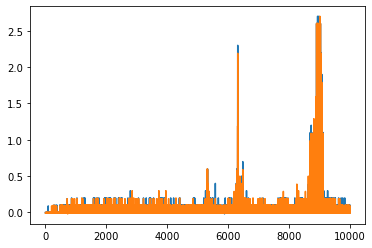

In [11]:
##Plot of score for each agent
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)

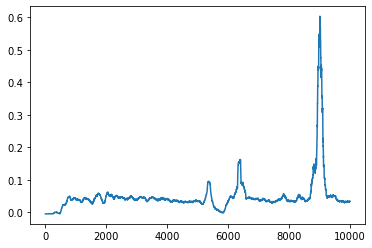

In [12]:
##Plot of average scores across agents
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_avg)+1), scores_avg)

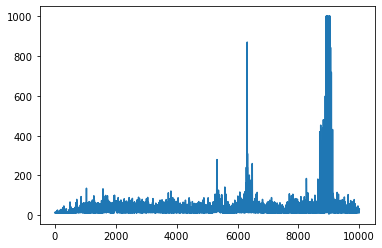

In [13]:
##Plot of steps taken at each episode
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(steps_taken)+1), steps_taken)

## Process Results 

Above deque average is over the scores of both agents for a given episode not the maximum score between both agents, therefore we recast the scores array to determine the maximum and recalculate the average over the past 100 episodes for every episode. An average score greater than 0.5 means the environment has been solved.

In [14]:
window = deque(maxlen=100)
window_avg = []
scores_max = []

for t in range(len(scores)):
    ##Calculate max score between agents for an episode
    score = np.amax(scores[t])
    
    ##Append max score to deque
    window.append(score)
    
    ##Append scores to arrays for plotting
    window_avg.append(np.mean(window))
    scores_max.append(score)
    
    ##Print episodes during which the solution was solved
    if np.mean(window) > 0.5:
        print(t)
    

8977
8978
8979
8980
8981
8982
8983
8984
8985
8986
8987
8988
8989
8990
8991
8992
8993
8994
8995
8996
8997
8998
8999
9000
9001
9002
9003
9004
9005
9006
9007
9008
9009
9010
9011
9012
9013
9014
9015
9016
9017
9018
9019
9020
9021
9022
9023
9024
9025
9026
9027
9028
9029
9030
9031
9032
9033
9034
9035
9036
9037
9038
9039
9040
9041
9042
9043
9044
9045
9046
9047
9048
9049
9050


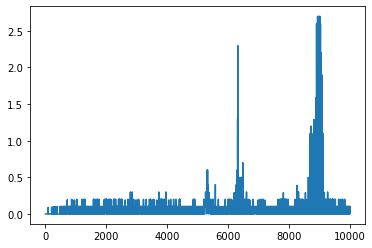

In [16]:
##Plot of max scores between agents
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_max)+1), scores_max)

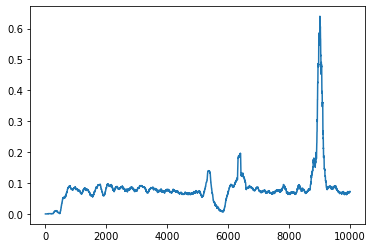

In [17]:
##Plot of average max score over last 100 episodes
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(window_avg)+1), window_avg)

## Performance Summary

As above, the environment was considered solved for the 73 episodes between 8,977 and 9,050. A maximum average score of 0.64 was achieved after approximately 5 hours of training time.

On episode 8,942 a maximum score of 2.7 was reached by one of the agents during a rally containing 53 successful shots and 1,000 actions taken by the agents.